# THE ANALYSIS:


In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('TCG_cards_near_mint_data2_final.xlsx')

#df.head()


In [3]:
# Filter the DataFrame to keep only sets where the 'Precise Pull' column has non-NaN values
filtered_df = df.groupby('set_name').filter(lambda group: group['Precise Pull'].notna().any())

# Display the resulting DataFrame
filtered_df.head()

,card_name,card_link,image_link,printing,condition,rarity,card_number,price,set_name,Imprecise Pull,Precise Pull
2090,Code Card - Champion's Path Booster Pack,/product/251544/pokemon-champion-s-path-code-c...,https://tcgplayer-cdn.tcgplayer.com/product/25...,Normal,Near Mint,Code Card,NaN,$0.06,champions-path,1.0,1.0
2091,Weedle,/product/222995/pokemon-champion-s-path-weedle,https://tcgplayer-cdn.tcgplayer.com/product/22...,Normal,Near Mint,Common,02/73,$0.07,champions-path,NaN,NaN
2092,Weedle,/product/222995/pokemon-champion-s-path-weedle,https://tcgplayer-cdn.tcgplayer.com/product/22...,Reverse Holofoil,Near Mint,Common,02/73,$0.22,champions-path,NaN,NaN
2093,Kakuna,/product/222997/pokemon-champion-s-path-kakuna,https://tcgplayer-cdn.tcgplayer.com/product/22...,Normal,Near Mint,Common,03/73,$0.04,champions-path,NaN,NaN
2094,Kakuna,/product/222997/pokemon-champion-s-path-kakuna,https://tcgplayer-cdn.tcgplayer.com/product/22...,Reverse Holofoil,Near Mint,Common,03/73,$0.17,champions-path,NaN,NaN


In [4]:
unique_set_count = filtered_df['set_name'].nunique()
unique_set_count

39

... there is trainer gallery and shiny vault etc..

In [5]:
unique_set_names = filtered_df['set_name'].unique()
print(unique_set_names)

['champions-path' 'crown-zenith' 'crown-zenith-galarian-gallery'
 'hidden-fates-shiny-vault' 'hidden-fates' 'shining-fates'
 'shining-fates-shiny-vault' 'shining-legends' 'sm-base-set'
 'sm-burning-shadows' 'sm-celestial-storm' 'sm-cosmic-eclipse'
 'sm-crimson-invasion' 'sm-forbidden-light' 'sm-guardians-rising'
 'sm-lost-thunder' 'sm-team-up' 'sm-ultra-prism' 'sm-unbroken-bonds'
 'sm-unified-minds' 'sv-paldean-fates' 'sv-scarlet-and-violet-151'
 'sv01-scarlet-and-violet-base-set' 'sv02-paldea-evolved'
 'sv03-obsidian-flames' 'sv04-paradox-rift' 'sv05-temporal-forces'
 'sv06-twilight-masquerade' 'sv07-stellar-crown'
 'swsh01-sword-and-shield-base-set' 'swsh02-rebel-clash'
 'swsh03-darkness-ablaze' 'swsh07-evolving-skies'
 'swsh10-astral-radiance-trainer-gallery' 'swsh10-astral-radiance'
 'swsh11-lost-origin-trainer-gallery' 'swsh11-lost-origin'
 'swsh12-silver-tempest' 'swsh12-silver-tempest-trainer-gallery']


In [6]:
import pandas as pd

# Mapping function to group `trainer-gallery` and `shiny-vault` under their main set names
def group_set_names(set_name):
    if 'trainer-gallery' in set_name:
        return set_name.replace('-trainer-gallery', '')
    elif 'shiny-vault' in set_name:
        return set_name.replace('-shiny-vault', '')
    elif 'galarian-gallery' in set_name:
        return set_name.replace('-galarian-gallery', '')
    return set_name

# Apply the mapping function to create a new column
filtered_df['set_name_grouped'] = filtered_df['set_name'].apply(group_set_names)

# Display unique values in the new grouped column
grouped_set_names = filtered_df['set_name_grouped'].unique()
print(grouped_set_names)


['champions-path' 'crown-zenith' 'hidden-fates' 'shining-fates'
 'shining-legends' 'sm-base-set' 'sm-burning-shadows' 'sm-celestial-storm'
 'sm-cosmic-eclipse' 'sm-crimson-invasion' 'sm-forbidden-light'
 'sm-guardians-rising' 'sm-lost-thunder' 'sm-team-up' 'sm-ultra-prism'
 'sm-unbroken-bonds' 'sm-unified-minds' 'sv-paldean-fates'
 'sv-scarlet-and-violet-151' 'sv01-scarlet-and-violet-base-set'
 'sv02-paldea-evolved' 'sv03-obsidian-flames' 'sv04-paradox-rift'
 'sv05-temporal-forces' 'sv06-twilight-masquerade' 'sv07-stellar-crown'
 'swsh01-sword-and-shield-base-set' 'swsh02-rebel-clash'
 'swsh03-darkness-ablaze' 'swsh07-evolving-skies' 'swsh10-astral-radiance'
 'swsh11-lost-origin' 'swsh12-silver-tempest']


In [7]:
grouped_unique_set_count = filtered_df['set_name_grouped'].nunique()
grouped_unique_set_count

33

perfect, now we have all the sets properly grouped (including vaults and galleries)..

In [8]:
# Reset the index of the DataFrame
filtered_df = filtered_df.reset_index(drop=True)

# Display the DataFrame to confirm the new index
#filtered_df.head()


In [9]:
# Remove the dollar sign and convert the price column to numeric
filtered_df['price'] = filtered_df['price'].replace({r'\$': ''}, regex=True).astype(float)

# Display the DataFrame to confirm the conversion
filtered_df.head()


,card_name,card_link,image_link,printing,condition,rarity,card_number,price,set_name,Imprecise Pull,Precise Pull,set_name_grouped
0,Code Card - Champion's Path Booster Pack,/product/251544/pokemon-champion-s-path-code-c...,https://tcgplayer-cdn.tcgplayer.com/product/25...,Normal,Near Mint,Code Card,NaN,0.06,champions-path,1.0,1.0,champions-path
1,Weedle,/product/222995/pokemon-champion-s-path-weedle,https://tcgplayer-cdn.tcgplayer.com/product/22...,Normal,Near Mint,Common,02/73,0.07,champions-path,NaN,NaN,champions-path
2,Weedle,/product/222995/pokemon-champion-s-path-weedle,https://tcgplayer-cdn.tcgplayer.com/product/22...,Reverse Holofoil,Near Mint,Common,02/73,0.22,champions-path,NaN,NaN,champions-path
3,Kakuna,/product/222997/pokemon-champion-s-path-kakuna,https://tcgplayer-cdn.tcgplayer.com/product/22...,Normal,Near Mint,Common,03/73,0.04,champions-path,NaN,NaN,champions-path
4,Kakuna,/product/222997/pokemon-champion-s-path-kakuna,https://tcgplayer-cdn.tcgplayer.com/product/22...,Reverse Holofoil,Near Mint,Common,03/73,0.17,champions-path,NaN,NaN,champions-path


In [10]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11285 entries, 0 to 11284
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   card_name         11285 non-null  object 
 1   card_link         11285 non-null  object 
 2   image_link        11285 non-null  object 
 3   printing          11285 non-null  object 
 4   condition         11285 non-null  object 
 5   rarity            11285 non-null  object 
 6   card_number       11198 non-null  object 
 7   price             11285 non-null  float64
 8   set_name          11285 non-null  object 
 9   Imprecise Pull    791 non-null    float64
 10  Precise Pull      2394 non-null   float64
 11  set_name_grouped  11285 non-null  object 
dtypes: float64(3), object(9)
memory usage: 1.0+ MB


In [11]:
# Rename the columns
filtered_df = filtered_df.rename(columns={
    'Precise Pull': 'precise_pull',
    'Imprecise Pull': 'imprecise_pull'
})

# Display the DataFrame to confirm the renaming
filtered_df.head()


,card_name,card_link,image_link,printing,condition,rarity,card_number,price,set_name,imprecise_pull,precise_pull,set_name_grouped
0,Code Card - Champion's Path Booster Pack,/product/251544/pokemon-champion-s-path-code-c...,https://tcgplayer-cdn.tcgplayer.com/product/25...,Normal,Near Mint,Code Card,NaN,0.06,champions-path,1.0,1.0,champions-path
1,Weedle,/product/222995/pokemon-champion-s-path-weedle,https://tcgplayer-cdn.tcgplayer.com/product/22...,Normal,Near Mint,Common,02/73,0.07,champions-path,NaN,NaN,champions-path
2,Weedle,/product/222995/pokemon-champion-s-path-weedle,https://tcgplayer-cdn.tcgplayer.com/product/22...,Reverse Holofoil,Near Mint,Common,02/73,0.22,champions-path,NaN,NaN,champions-path
3,Kakuna,/product/222997/pokemon-champion-s-path-kakuna,https://tcgplayer-cdn.tcgplayer.com/product/22...,Normal,Near Mint,Common,03/73,0.04,champions-path,NaN,NaN,champions-path
4,Kakuna,/product/222997/pokemon-champion-s-path-kakuna,https://tcgplayer-cdn.tcgplayer.com/product/22...,Reverse Holofoil,Near Mint,Common,03/73,0.17,champions-path,NaN,NaN,champions-path


In [12]:
filtered_df.describe()

,price,imprecise_pull,precise_pull
count,11285.000000,791.000000,2394.000000
mean,2.772173,0.046094,0.018003
std,19.318656,0.199191,0.116182
min,0.020000,0.001100,0.000500
25%,0.090000,0.002100,0.001837
50%,0.200000,0.003200,0.002433
75%,0.590000,0.006400,0.006481
max,975.130000,1.000000,1.000000


In [13]:
# Display unique values in the printing
grouped_set_names = filtered_df['printing'].unique()
print(grouped_set_names)

['Normal' 'Reverse Holofoil' 'Holofoil']


In [14]:
# Display unique values in the rarity
grouped_set_names = filtered_df['rarity'].unique()
print(grouped_set_names)

['Code Card' 'Common' 'Holo Rare' 'Secret Rare' 'Ultra Rare' 'Uncommon'
 'Radiant Rare' 'Rare' 'Shiny Holo Rare' 'Amazing Rare' 'Prism Rare'
 'Double Rare' 'Hyper Rare' 'Illustration Rare' 'Shiny Rare'
 'Shiny Ultra Rare' 'Special Illustration Rare' 'ACE SPEC Rare']


In [15]:
# Dictionary mapping set names to their release dates from: https://www.pokemon.com/us/pokemon-tcg/trading-card-expansions
set_release_dates = {
    'sm-base-set': '2017-02-03',
    'sm-guardians-rising': '2017-05-05',
    'sm-burning-shadows': '2017-08-04',
    'shining-legends': '2017-10-06',
    'sm-crimson-invasion': '2017-11-03',
    'sm-ultra-prism': '2018-02-02',
    'sm-forbidden-light': '2018-05-04',
    'sm-celestial-storm': '2018-08-03',
    'dragon-majesty': '2018-09-07',
    'sm-lost-thunder': '2018-11-02',
    'sm-team-up': '2019-02-01',
    'detective-pikachu': '2019-03-29',
    'sm-unbroken-bonds': '2019-05-03',
    'sm-unified-minds': '2019-08-02',
    'hidden-fates': '2019-08-23',
    'sm-cosmic-eclipse': '2019-11-01',
    'swsh01-sword-and-shield-base-set': '2020-02-07',
    'swsh02-rebel-clash': '2020-05-01',
    'swsh03-darkness-ablaze': '2020-08-14',
    'champions-path': '2020-09-25',
    'swsh04-vivid-voltage': '2020-11-13',
    'shining-fates': '2021-02-19',
    'swsh05-battle-styles': '2021-03-19',
    'swsh06-chilling-reign': '2021-06-18',
    'swsh07-evolving-skies': '2021-08-27',
    'celebrations': '2021-10-08',
    'swsh08-fusion-strike': '2021-11-12',
    'swsh09-brilliant-stars': '2022-02-25',
    'swsh10-astral-radiance': '2022-05-27',
    'pokemon-go': '2022-07-01',
    'swsh11-lost-origin': '2022-09-09',
    'swsh12-silver-tempest': '2022-11-11',
    'crown-zenith': '2023-01-20',
    'sv01-scarlet-and-violet-base-set': '2023-03-31',
    'sv02-paldea-evolved': '2023-06-09',
    'sv03-obsidian-flames': '2023-08-11',
    'sv-scarlet-and-violet-151': '2023-09-22',
    'sv04-paradox-rift': '2023-11-03',
    'sv-paldean-fates': '2024-01-26',
    'sv05-temporal-forces': '2024-03-22',
    'sv06-twilight-masquerade': '2024-05-24',
    'sv07-stellar-crown': '2024-09-13',
    'sv08-shrouded-fable': '2024-08-02',
    'sv09-surging-sparks': '2024-11-08',
    'sv10-prismatic-evolutions': '2025-01-17',
}

# Adding release dates to the DataFrame
filtered_df['release_date'] = filtered_df['set_name_grouped'].map(set_release_dates)

# Displaying the first few rows to confirm
print(filtered_df[['set_name_grouped', 'release_date']].head())


  set_name_grouped release_date
0   champions-path   2020-09-25
1   champions-path   2020-09-25
2   champions-path   2020-09-25
3   champions-path   2020-09-25
4   champions-path   2020-09-25


In [16]:
filtered_df

,card_name,card_link,image_link,printing,condition,rarity,card_number,price,set_name,imprecise_pull,precise_pull,set_name_grouped,release_date
0,Code Card - Champion's Path Booster Pack,/product/251544/pokemon-champion-s-path-code-c...,https://tcgplayer-cdn.tcgplayer.com/product/25...,Normal,Near Mint,Code Card,NaN,0.06,champions-path,1.0,1.0,champions-path,2020-09-25
1,Weedle,/product/222995/pokemon-champion-s-path-weedle,https://tcgplayer-cdn.tcgplayer.com/product/22...,Normal,Near Mint,Common,02/73,0.07,champions-path,NaN,NaN,champions-path,2020-09-25
2,Weedle,/product/222995/pokemon-champion-s-path-weedle,https://tcgplayer-cdn.tcgplayer.com/product/22...,Reverse Holofoil,Near Mint,Common,02/73,0.22,champions-path,NaN,NaN,champions-path,2020-09-25
3,Kakuna,/product/222997/pokemon-champion-s-path-kakuna,https://tcgplayer-cdn.tcgplayer.com/product/22...,Normal,Near Mint,Common,03/73,0.04,champions-path,NaN,NaN,champions-path,2020-09-25
4,Kakuna,/product/222997/pokemon-champion-s-path-kakuna,https://tcgplayer-cdn.tcgplayer.com/product/22...,Reverse Holofoil,Near Mint,Common,03/73,0.17,champions-path,NaN,NaN,champions-path,2020-09-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11280,Worker,/product/451815/pokemon-swsh12-silver-tempest-...,https://tcgplayer-cdn.tcgplayer.com/product/45...,Reverse Holofoil,Near Mint,Uncommon,167/195,0.26,swsh12-silver-tempest,NaN,NaN,swsh12-silver-tempest,2022-11-11
11281,Regenerative Energy,/product/451816/pokemon-swsh12-silver-tempest-...,https://tcgplayer-cdn.tcgplayer.com/product/45...,Normal,Near Mint,Uncommon,168/195,0.09,swsh12-silver-tempest,NaN,NaN,swsh12-silver-tempest,2022-11-11
11282,Regenerative Energy,/product/451816/pokemon-swsh12-silver-tempest-...,https://tcgplayer-cdn.tcgplayer.com/product/45...,Reverse Holofoil,Near Mint,Uncommon,168/195,0.10,swsh12-silver-tempest,NaN,NaN,swsh12-silver-tempest,2022-11-11
11283,V Guard Energy,/product/451817/pokemon-swsh12-silver-tempest-...,https://tcgplayer-cdn.tcgplayer.com/product/45...,Normal,Near Mint,Uncommon,169/195,0.09,swsh12-silver-tempest,NaN,NaN,swsh12-silver-tempest,2022-11-11


### Check for how influential the reverse holo/holo is on the expected value values:

In [17]:
def calculate_booster_pack_value(df):
    """
    Calculate the expected value of a booster pack for each set.

    Parameters:
    - df (pd.DataFrame): DataFrame containing card data with columns 'set_name_grouped', 'price', 'precise_pull', 'rarity'.

    Returns:
    - pd.DataFrame: DataFrame with columns ['set_name_grouped', 'expected_value'].
    """
    results = []

    # Group by set
    grouped = df.groupby('set_name_grouped')

    for set_name, group in grouped:
        # Step 1: Bulk cards (cards with NaN pull rates)
        bulk_cards = group[group['precise_pull'].isna()]
        bulk_price_avg = bulk_cards['price'].mean() if not bulk_cards.empty else 0
        bulk_value = bulk_price_avg * 10

        # Step 2: Cards with pull rates (including code cards)
        cards_with_pull_rates = group[group['precise_pull'].notna()]
        pull_rate_value = (cards_with_pull_rates['precise_pull'] * cards_with_pull_rates['price']).sum()

        # Step 3: Total expected value
        expected_value = bulk_value + pull_rate_value

        # Append result for this set
        results.append({'set_name_grouped': set_name, 'expected_value': expected_value, 'bulk_value': bulk_value, 'pull_rate_value': pull_rate_value})

    # Convert results to a DataFrame
    return pd.DataFrame(results)


In [18]:


# Calculate the expected value of booster packs
booster_pack_values = calculate_booster_pack_value(filtered_df)

# Display the results
booster_pack_values


,set_name_grouped,expected_value,bulk_value,pull_rate_value
0,champions-path,2.987305,1.418519,1.568787
1,crown-zenith,4.064795,1.687281,2.377514
2,hidden-fates,7.267429,2.263393,5.004036
3,shining-fates,2.439886,1.168478,1.271408
4,shining-legends,6.988347,3.110833,3.877514
5,sm-base-set,3.150060,2.229259,0.920801
6,sm-burning-shadows,3.524877,2.059914,1.464964
7,sm-celestial-storm,6.941998,4.758759,2.183239
8,sm-cosmic-eclipse,8.871870,4.598964,4.272906
9,sm-crimson-invasion,3.673729,2.875000,0.798729


In [19]:
def calculate_booster_pack_value2(df):
    """
    Calculate the expected value of a booster pack for each set,
    and include the influence and weighted contribution of Reverse Holo and Holofoil cards.

    Parameters:
    - df (pd.DataFrame): DataFrame with columns 'set_name_grouped', 'price', 'precise_pull', 'printing'.

    Returns:
    - pd.DataFrame: One row per set with expected values, influence, and contribution measures.
    """
    results = []

    grouped = df.groupby('set_name_grouped')

    for set_name, group in grouped:
        bulk_cards = group[group['precise_pull'].isna()]
        bulk_price_avg = bulk_cards['price'].mean() if not bulk_cards.empty else 0
        bulk_value = bulk_price_avg * 10  # 10 cards per pack assumption

        # Subsets
        reverse_bulk = bulk_cards[bulk_cards['printing'] == 'Reverse Holofoil']
        holo_bulk = bulk_cards[bulk_cards['printing'] == 'Holofoil']
        normal_bulk = bulk_cards[~bulk_cards['printing'].isin(['Reverse Holofoil', 'Holofoil'])]

        # Counts
        n_reverse = len(reverse_bulk)
        n_holo = len(holo_bulk)
        n_normal = len(normal_bulk)
        n_total = n_reverse + n_holo + n_normal

        # Means
        μ_reverse = reverse_bulk['price'].mean() if n_reverse > 0 else 0
        μ_holo = holo_bulk['price'].mean() if n_holo > 0 else 0
        μ_normal = normal_bulk['price'].mean() if n_normal > 0 else 0
        μ_bulk_total = bulk_price_avg

        # Influence (abs + %)
        influence_reverse = μ_reverse - μ_normal if n_normal > 0 else None
        relative_influence_reverse = (
            (μ_reverse - μ_normal) / μ_normal * 100 if μ_normal > 0 else None
        )

        influence_holo = μ_holo - μ_normal if n_normal > 0 else None
        relative_influence_holo = (
            (μ_holo - μ_normal) / μ_normal * 100 if μ_normal > 0 else None
        )

        # Weighted contribution to bulk average
        weight_reverse = n_reverse / n_total if n_total > 0 else 0
        weight_holo = n_holo / n_total if n_total > 0 else 0
        weight_normal = n_normal / n_total if n_total > 0 else 0

        contribution_reverse = μ_reverse * weight_reverse
        contribution_holo = μ_holo * weight_holo
        contribution_normal = μ_normal * weight_normal

        # Check: should ≈ μ_bulk_total
        μ_bulk_weighted = contribution_reverse + contribution_holo + contribution_normal

        # Pull rate section
        cards_with_pull_rates = group[group['precise_pull'].notna()]
        pull_rate_value = (cards_with_pull_rates['precise_pull'] * cards_with_pull_rates['price']).sum()

        expected_value = bulk_value + pull_rate_value

        results.append({
            'set_name_grouped': set_name,
            'expected_value': expected_value,
            'pull_rate_value': pull_rate_value,
            'bulk_value': bulk_value,
            
            #'μ_bulk_total': μ_bulk_total,
            #'μ_normal_bulk': μ_normal,
            #'μ_reverse_bulk': μ_reverse,
            #'μ_holo_bulk': μ_holo,
            #'influence_reverse_abs': influence_reverse,
            #'influence_reverse_pct': relative_influence_reverse,
            #'influence_holo_abs': influence_holo,
            #'influence_holo_pct': relative_influence_holo,
            #'weight_normal': weight_normal,
            #'weight_reverse': weight_reverse,
            #'weight_holo': weight_holo,
            'contribution_normal': contribution_normal,
            'contribution_reverse': contribution_reverse,
            'contribution_holo': contribution_holo,
            'μ_bulk_weighted_check': μ_bulk_weighted,
            'n_normal': n_normal,
            'n_reverse': n_reverse,
            'n_holo': n_holo
        })

    return pd.DataFrame(results)

# Calculate the expected value of booster packs
booster_pack_values_w_effects = calculate_booster_pack_value2(filtered_df)

# Display the results
booster_pack_values_w_effects

,set_name_grouped,expected_value,pull_rate_value,bulk_value,contribution_normal,contribution_reverse,contribution_holo,μ_bulk_weighted_check,n_normal,n_reverse,n_holo
0,champions-path,2.987305,1.568787,1.418519,0.024630,0.103056,0.014167,0.141852,44,54,10
1,crown-zenith,4.064795,2.377514,1.687281,0.020570,0.107895,0.040263,0.168728,93,112,23
2,hidden-fates,7.267429,5.004036,2.263393,0.050893,0.156875,0.018571,0.226339,50,56,6
3,shining-fates,2.439886,1.271408,1.168478,0.023261,0.081196,0.012391,0.116848,39,46,7
4,shining-legends,6.988347,3.877514,3.110833,0.059667,0.221667,0.029750,0.311083,48,60,12
5,sm-base-set,3.150060,0.920801,2.229259,0.041741,0.159815,0.021370,0.222926,119,135,16
6,sm-burning-shadows,3.524877,1.464964,2.059914,0.057586,0.129741,0.018664,0.205991,103,116,13
7,sm-celestial-storm,6.941998,2.183239,4.758759,0.092555,0.295328,0.087993,0.475876,119,137,18
8,sm-cosmic-eclipse,8.871870,4.272906,4.598964,0.092098,0.304378,0.063420,0.459896,171,193,22
9,sm-crimson-invasion,3.673729,0.798729,2.875000,0.062446,0.189457,0.035598,0.287500,80,92,12


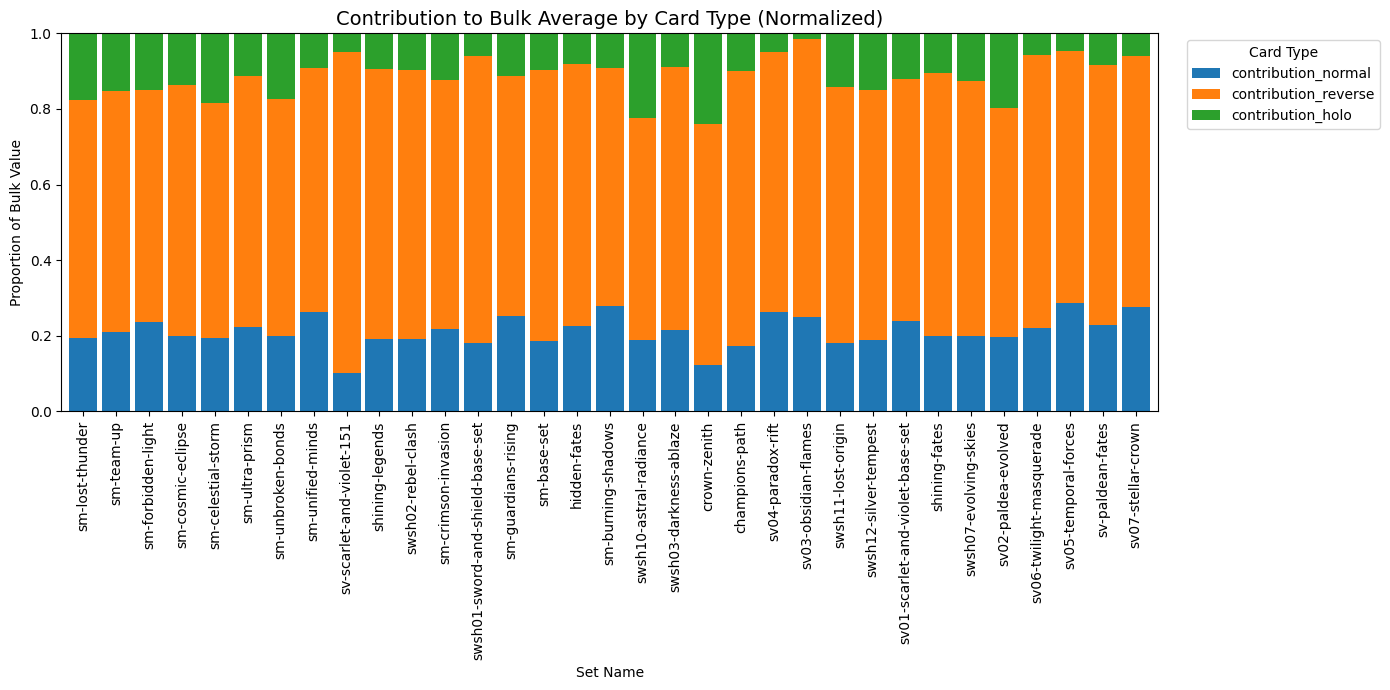

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Sort sets if you want (e.g. by reverse holo contribution descending)
df = booster_pack_values_w_effects.copy()
df = df.sort_values(by='contribution_reverse', ascending=False)

# Normalize the contributions so they sum to 1 per set
contrib_df = df[['set_name_grouped', 'contribution_normal', 'contribution_reverse', 'contribution_holo']].copy()
contrib_df.set_index('set_name_grouped', inplace=True)

# Normalize to 100% contribution (sum to 1 per row)
contrib_normalized = contrib_df.div(contrib_df.sum(axis=1), axis=0)

# Plot
fig, ax = plt.subplots(figsize=(14, 7))

contrib_normalized.plot(kind='bar', stacked=True, ax=ax, width=0.85)

ax.set_title('Contribution to Bulk Average by Card Type (Normalized)', fontsize=14)
ax.set_ylabel('Proportion of Bulk Value')
ax.set_xlabel('Set Name')
ax.legend(title='Card Type', bbox_to_anchor=(1.02, 1), loc='upper left')
ax.set_ylim(0, 1)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


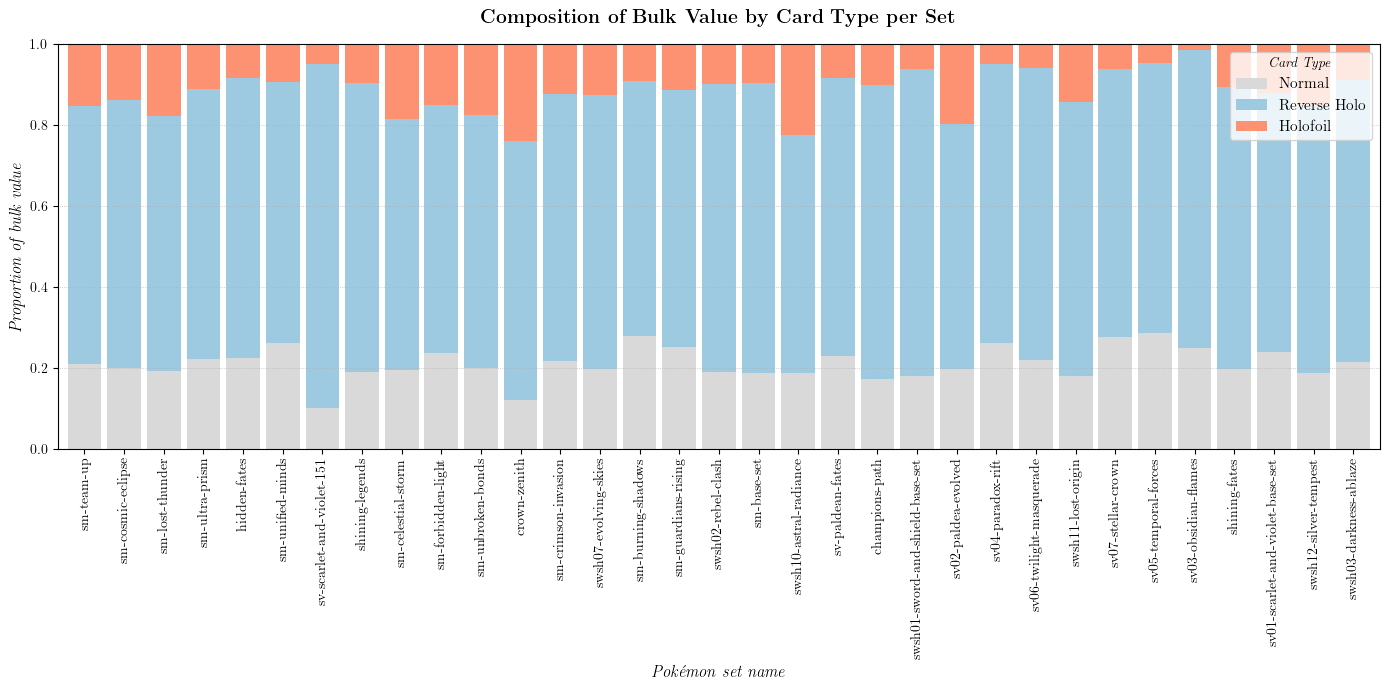

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl

# Enable LaTeX-style plotting
mpl.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "axes.labelsize": 12,
    "axes.titlesize": 14,
    "legend.fontsize": 11,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
})

# Prepare and sort data
df = booster_pack_values_w_effects.copy()
df = df.sort_values(by='expected_value', ascending=False)  # Change this line to sort by any column

# Normalize contributions
contrib_df = df[['set_name_grouped', 'contribution_normal', 'contribution_reverse', 'contribution_holo']].copy()
contrib_df.set_index('set_name_grouped', inplace=True)
contrib_normalized = contrib_df.div(contrib_df.sum(axis=1), axis=0)

# Plot
fig, ax = plt.subplots(figsize=(14, 7))

colors = ['#d9d9d9', '#9ecae1', '#fc9272']  # soft grayscale + gentle blue/red
contrib_normalized.plot(kind='bar', stacked=True, ax=ax, color=colors, width=0.85)

ax.set_title(r'\textbf{Composition of Bulk Value by Card Type per Set}', pad=15)
ax.set_ylabel(r'\textit{Proportion of bulk value}')
ax.set_xlabel(r'\textit{Pok\'emon set name}')
ax.set_ylim(0, 1)
ax.legend(title=r'\textit{Card Type}', labels=['Normal', 'Reverse Holo', 'Holofoil'], loc='upper right')
ax.grid(axis='y', linestyle=':', linewidth=0.5)

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## now the more detailed bulk value decomposition:


In [22]:
import re

def calculate_booster_pack_value_detailed_final_with_check(df):
    """
    Calculates expected value and detailed contribution breakdown with fixed rarity logic and energy detection.
    Also tracks any bulk cards that were not included in any category.
    """
    results = []
    omitted_cards = []  # 🧾 Store cards that were skipped
    grouped = df.groupby('set_name_grouped')

    rare_types = [
        'Rare', 'Holo Rare', 'Ultra Rare', 'Secret Rare', 'Radiant Rare', 'Shiny Holo Rare',
        'Amazing Rare', 'Prism Rare', 'Double Rare', 'Hyper Rare', 'Illustration Rare',
        'Shiny Rare', 'Shiny Ultra Rare', 'Special Illustration Rare', 'ACE SPEC Rare'
    ]

    energy_keywords = [
        'Fire Energy', 'Water Energy', 'Fighting Energy', 'Dark Energy', 'Grass Energy',
        'Lightning Energy', 'Psychic Energy', 'Metal Energy', 'Fairy Energy'
    ]
    energy_pattern = '|'.join(re.escape(word) for word in energy_keywords)

    for set_name, group in grouped:
        bulk_cards = group[group['precise_pull'].isna()]
        bulk_price_avg = bulk_cards['price'].mean() if not bulk_cards.empty else 0
        bulk_value = bulk_price_avg * 10

        energy_cards = bulk_cards[
            (bulk_cards['card_name'].str.contains(energy_pattern, case=False, na=False)) &
            (bulk_cards['rarity'] == 'Common')
        ]
        bulk_non_energy = bulk_cards.drop(index=energy_cards.index)

        categories = {
            'common': bulk_non_energy[(bulk_non_energy['rarity'] == 'Common') & (bulk_non_energy['printing'] == 'Normal')],
            'uncommon': bulk_non_energy[(bulk_non_energy['rarity'] == 'Uncommon') & (bulk_non_energy['printing'] == 'Normal')],
            'rare_non_holo': bulk_non_energy[(bulk_non_energy['rarity'].isin(rare_types)) & (bulk_non_energy['printing'] == 'Normal')],
            'holo_rare': bulk_non_energy[(bulk_non_energy['rarity'].isin(rare_types)) & (bulk_non_energy['printing'] == 'Holofoil')],
            'reverse_common': bulk_non_energy[(bulk_non_energy['rarity'] == 'Common') & (bulk_non_energy['printing'] == 'Reverse Holofoil')],
            'reverse_uncommon': bulk_non_energy[(bulk_non_energy['rarity'] == 'Uncommon') & (bulk_non_energy['printing'] == 'Reverse Holofoil')],
            'reverse_rare': bulk_non_energy[(bulk_non_energy['rarity'].isin(rare_types)) & (bulk_non_energy['printing'] == 'Reverse Holofoil')],
            'energy': energy_cards
        }

        # --- Check for uncategorized bulk cards ---
        all_categorized_indices = pd.Index([])
        for cat_df in categories.values():
            all_categorized_indices = all_categorized_indices.union(cat_df.index)

        uncategorized = bulk_cards.loc[~bulk_cards.index.isin(all_categorized_indices)].copy()
        if not uncategorized.empty:
            uncategorized['set_name_grouped'] = set_name
            omitted_cards.append(uncategorized)

        # --- Contributions ---
        total_bulk_cards = sum(len(cat) for cat in categories.values())
        contribs = {}
        for key, cat_df in categories.items():
            n = len(cat_df)
            μ = cat_df['price'].mean() if n > 0 else 0
            w = n / total_bulk_cards if total_bulk_cards > 0 else 0
            contribs[f'contribution_{key}'] = μ * w

        μ_bulk_weighted = sum(contribs.values())

        # Pull-rate value
        cards_with_pull_rates = group[group['precise_pull'].notna()]
        pull_rate_value = (cards_with_pull_rates['precise_pull'] * cards_with_pull_rates['price']).sum()

        expected_value = bulk_value + pull_rate_value

        result = {
            'set_name_grouped': set_name,
            'expected_value': expected_value,
            'pull_rate_value': pull_rate_value,
            'bulk_value': bulk_value,
            'μ_bulk_weighted_check': μ_bulk_weighted
        }
        result.update(contribs)
        results.append(result)

    final_df = pd.DataFrame(results)

    # Combine omitted cards across all sets
    omitted_df = pd.concat(omitted_cards, ignore_index=True) if omitted_cards else pd.DataFrame()

    return final_df, omitted_df


booster_pack_values, omitted_cards_df = calculate_booster_pack_value_detailed_final_with_check(filtered_df)

# Show just the sets where cards were missed
if not omitted_cards_df.empty:
    print("Cards omitted from all defined categories:")
    display(omitted_cards_df[['set_name_grouped', 'card_name', 'printing', 'rarity', 'price']])
else:
    print("All cards were correctly categorized!")


Cards omitted from all defined categories:


,set_name_grouped,card_name,printing,rarity,price
0,sv01-scarlet-and-violet-base-set,Basic Darkness Energy (Cosmos Holo),Holofoil,Common,0.63
1,sv02-paldea-evolved,Frigibax - 058/193 (Holiday Calendar),Holofoil,Common,2.31


-> so the Darkness Energy added to the list of energies, and frigibax deleted completely..:



In [23]:
# Remove the Frigibax Holiday Calendar card from the dataset
filtered_df = filtered_df[filtered_df['card_name'] != 'Frigibax - 058/193 (Holiday Calendar)']


In [24]:
import pandas as pd
import re

def calculate_booster_pack_value_detailed_final2(df):
    """
    Calculates expected value and detailed contribution breakdown with fixed rarity logic,
    energy detection, and adds all counts needed for EV formula weighting.
    Includes both original EV and adjusted EV based on pack structure (SV vs. pre-SV).
    """
    results = []
    grouped = df.groupby('set_name_grouped')

    rare_types = [
        'Rare', 'Holo Rare', 'Ultra Rare', 'Secret Rare', 'Radiant Rare', 'Shiny Holo Rare',
        'Amazing Rare', 'Prism Rare', 'Double Rare', 'Hyper Rare', 'Illustration Rare',
        'Shiny Rare', 'Shiny Ultra Rare', 'Special Illustration Rare', 'ACE SPEC Rare'
    ]

    energy_keywords = [
        'Fire Energy', 'Water Energy', 'Fighting Energy', 'Dark Energy', 'Darkness Energy',
        'Grass Energy', 'Lightning Energy', 'Psychic Energy', 'Metal Energy', 'Fairy Energy'
    ]
    energy_pattern = '|'.join(re.escape(word) for word in energy_keywords)

    for set_name, group in grouped:
        # Identify SV era
        is_sv_era = set_name.startswith('sv')

        # Filter cards
        bulk_cards = group[group['precise_pull'].isna()]
        bulk_price_avg = bulk_cards['price'].mean() if not bulk_cards.empty else 0
        bulk_value_simple = bulk_price_avg * 10  # original estimate

        energy_cards = bulk_cards[
            (bulk_cards['card_name'].str.contains(energy_pattern, case=False, na=False)) &
            (bulk_cards['rarity'] == 'Common')
        ]
        bulk_non_energy = bulk_cards.drop(index=energy_cards.index)

        # Define categories
        categories = {
            'common': bulk_non_energy[(bulk_non_energy['rarity'] == 'Common') & (bulk_non_energy['printing'] == 'Normal')],
            'uncommon': bulk_non_energy[(bulk_non_energy['rarity'] == 'Uncommon') & (bulk_non_energy['printing'] == 'Normal')],
            'rare_non_holo': bulk_non_energy[(bulk_non_energy['rarity'].isin(rare_types)) & (bulk_non_energy['printing'] == 'Normal')],
            'holo_rare': bulk_non_energy[(bulk_non_energy['rarity'].isin(rare_types)) & (bulk_non_energy['printing'] == 'Holofoil')],
            'reverse_common': bulk_non_energy[(bulk_non_energy['rarity'] == 'Common') & (bulk_non_energy['printing'] == 'Reverse Holofoil')],
            'reverse_uncommon': bulk_non_energy[(bulk_non_energy['rarity'] == 'Uncommon') & (bulk_non_energy['printing'] == 'Reverse Holofoil')],
            'reverse_rare': bulk_non_energy[(bulk_non_energy['rarity'].isin(rare_types)) & (bulk_non_energy['printing'] == 'Reverse Holofoil')],
            'energy': energy_cards
        }

        total_bulk_cards = sum(len(cat) for cat in categories.values())
        contribs = {}
        counts = {}

        for key, cat_df in categories.items():
            n = len(cat_df)
            μ = cat_df['price'].mean() if n > 0 else 0
            w = n / total_bulk_cards if total_bulk_cards > 0 else 0
            contribs[f'contribution_{key}'] = μ * w
            counts[f'n_{key}'] = n

        # Totals for formula weighting
        counts['n_rh_total'] = (
            counts.get('n_reverse_common', 0) +
            counts.get('n_reverse_uncommon', 0) +
            counts.get('n_reverse_rare', 0)
        )
        counts['n_rare_total'] = (
            counts.get('n_rare_non_holo', 0) +
            counts.get('n_holo_rare', 0)
        )

        μ_bulk_weighted = sum(contribs.values())

        # Pull rate EV
        cards_with_pull_rates = group[group['precise_pull'].notna()]
        pull_rate_value = (cards_with_pull_rates['precise_pull'] * cards_with_pull_rates['price']).sum()

        # Means
        μ_common = categories['common']['price'].mean() if counts['n_common'] > 0 else 0
        μ_uncommon = categories['uncommon']['price'].mean() if counts['n_uncommon'] > 0 else 0
        μ_energy = categories['energy']['price'].mean() if counts['n_energy'] > 0 else 0

        μ_reverse_common = categories['reverse_common']['price'].mean() if counts['n_reverse_common'] > 0 else 0
        μ_reverse_uncommon = categories['reverse_uncommon']['price'].mean() if counts['n_reverse_uncommon'] > 0 else 0
        μ_reverse_rare = categories['reverse_rare']['price'].mean() if counts['n_reverse_rare'] > 0 else 0

        μ_nonholo_rare = categories['rare_non_holo']['price'].mean() if counts['n_rare_non_holo'] > 0 else 0
        μ_holo_rare = categories['holo_rare']['price'].mean() if counts['n_holo_rare'] > 0 else 0

        # Weighted rare slot
        total_rare_slot = counts['n_rare_total']
        rare_slot_value = (
            (counts['n_holo_rare'] / total_rare_slot * μ_holo_rare if total_rare_slot > 0 else 0) +
            (counts['n_rare_non_holo'] / total_rare_slot * μ_nonholo_rare if total_rare_slot > 0 else 0)
        )

        # Weighted reverse holo slot(s)
        total_rh = counts['n_rh_total']
        reverse_holo_value = (
            (counts['n_reverse_rare'] / total_rh * μ_reverse_rare if total_rh > 0 else 0) +
            (counts['n_reverse_uncommon'] / total_rh * μ_reverse_uncommon if total_rh > 0 else 0) +
            (counts['n_reverse_common'] / total_rh * μ_reverse_common if total_rh > 0 else 0)
        )

        # Final formula-based bulk value
        if is_sv_era:
            bulk_value_formula = (
                rare_slot_value +
                2 * reverse_holo_value +
                3 * μ_uncommon +
                4 * μ_common +
                μ_energy
            )
        else:
            bulk_value_formula = (
                rare_slot_value +
                reverse_holo_value +
                3 * μ_uncommon +
                5 * μ_common +
                μ_energy
            )

        expected_value_formula = pull_rate_value + bulk_value_formula

        # Final results row
        result = {
            'set_name_grouped': set_name,
            'is_sv_era': is_sv_era,

            # Original estimate
            'expected_value': bulk_value_simple + pull_rate_value,
            'pull_rate_value': pull_rate_value,
            'bulk_value_simple': bulk_value_simple,
            'μ_bulk_weighted_check': μ_bulk_weighted,
            'μ_bulk_weighted_check*10': μ_bulk_weighted * 10,

            # New formula-based EV
            'expected_value_formula': expected_value_formula,
            'bulk_value_formula': bulk_value_formula,
            'rare_slot_value': rare_slot_value,
            'reverse_holo_value': reverse_holo_value,
            'new_ev_check': pull_rate_value + bulk_value_formula
          

        
        }

        result.update(contribs)
        result.update(counts)
        results.append(result)

    return pd.DataFrame(results)


booster_pack_values_detailed_final_FOR_FINAL_GRAPH = calculate_booster_pack_value_detailed_final2(filtered_df)



booster_pack_values_detailed_final2 = calculate_booster_pack_value_detailed_final2(filtered_df)
booster_pack_values_detailed_final2

# Step 1: Extract one release_date per set from filtered_df
release_dates = (
    filtered_df[['set_name_grouped', 'release_date']]
    .drop_duplicates(subset='set_name_grouped')
)

# Step 2: Merge with booster_pack_values_detailed_final2
booster_pack_values_detailed_final2 = booster_pack_values_detailed_final2.merge(
    release_dates,
    on='set_name_grouped',
    how='left'
)


display_columns = [
    'set_name_grouped',
    'expected_value',         # original EV
    'pull_rate_value',        # component of original EV
    'bulk_value_simple',      # component of original EV
    'μ_bulk_weighted_check*10',
    'expected_value_formula', # formula-based EV
    'new_ev_check',
    'bulk_value_formula',      # formula-based bulk value
    'release_date'
    
]

booster_pack_values_detailed_final2[display_columns]



,set_name_grouped,expected_value,pull_rate_value,bulk_value_simple,μ_bulk_weighted_check*10,expected_value_formula,new_ev_check,bulk_value_formula,release_date
0,champions-path,2.987305,1.568787,1.418519,1.418519,2.396511,2.396511,0.827724,2020-09-25
1,crown-zenith,4.064795,2.377514,1.687281,1.687281,3.178266,3.178266,0.800752,2023-01-20
2,hidden-fates,7.267429,5.004036,2.263393,2.263393,6.208739,6.208739,1.204702,2019-08-23
3,shining-fates,2.439886,1.271408,1.168478,1.168478,1.909970,1.909970,0.638562,2021-02-19
4,shining-legends,6.988347,3.877514,3.110833,3.110833,5.766799,5.766799,1.889286,2017-10-06
5,sm-base-set,3.150060,0.920801,2.229259,2.229259,2.642738,2.642738,1.721937,2017-02-03
6,sm-burning-shadows,3.524877,1.464964,2.059914,2.059914,2.796261,2.796261,1.331298,2017-08-04
7,sm-celestial-storm,6.941998,2.183239,4.758759,4.758759,4.996197,4.996197,2.812959,2018-08-03
8,sm-cosmic-eclipse,8.871870,4.272906,4.598964,4.598964,6.806074,6.806074,2.533168,2019-11-01
9,sm-crimson-invasion,3.673729,0.798729,2.875000,2.875000,2.453844,2.453844,1.655115,2017-11-03


In [25]:
booster_pack_values_detailed_final2.columns

Index(['set_name_grouped', 'is_sv_era', 'expected_value', 'pull_rate_value',
       'bulk_value_simple', 'μ_bulk_weighted_check',
       'μ_bulk_weighted_check*10', 'expected_value_formula',
       'bulk_value_formula', 'rare_slot_value', 'reverse_holo_value',
       'new_ev_check', 'contribution_common', 'contribution_uncommon',
       'contribution_rare_non_holo', 'contribution_holo_rare',
       'contribution_reverse_common', 'contribution_reverse_uncommon',
       'contribution_reverse_rare', 'contribution_energy', 'n_common',
       'n_uncommon', 'n_rare_non_holo', 'n_holo_rare', 'n_reverse_common',
       'n_reverse_uncommon', 'n_reverse_rare', 'n_energy', 'n_rh_total',
       'n_rare_total', 'release_date'],
      dtype='object')

## now the visualisation of the Booster Pack Value decomposition: 
 


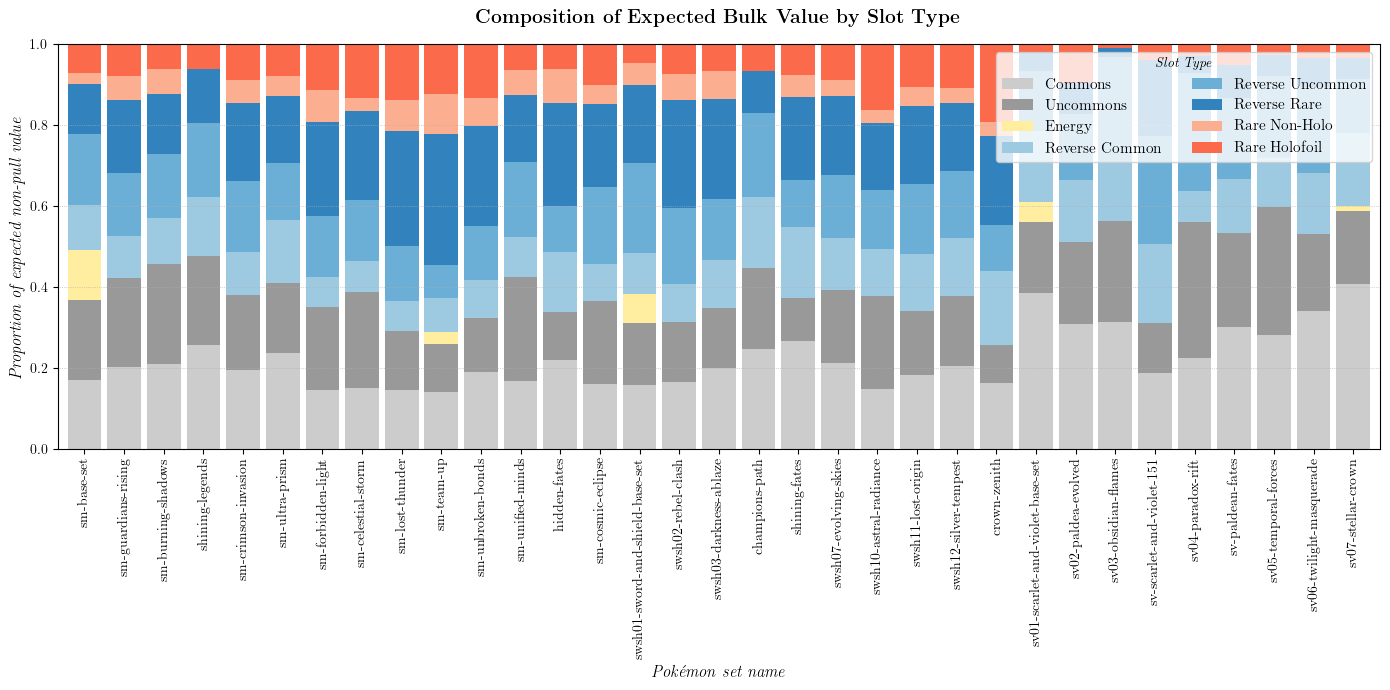

In [26]:
# Extract per-card-type contribution columns from your EV dataframe
cols = [
    'contribution_common', 'contribution_uncommon', 'contribution_energy',
    'contribution_rare_non_holo', 'contribution_holo_rare',
    'contribution_reverse_common', 'contribution_reverse_uncommon', 'contribution_reverse_rare'
]

# Ensure all columns are present
df_slot = booster_pack_values_detailed_final2[['set_name_grouped'] + cols].copy()
df_slot.set_index('set_name_grouped', inplace=True)

# Multiply each slot by its frequency per pack (based on SV or pre-SV rules)
def adjust_slots(row):
    is_sv = row.get('is_sv_era', False)
    return pd.Series({
        'Commons': 4 * row['contribution_common'] if is_sv else 5 * row['contribution_common'],
        'Uncommons': 3 * row['contribution_uncommon'],
        'Energy': row['contribution_energy'],
        'Reverse Common': 1 * row['contribution_reverse_common'] if not is_sv else 2 * row['contribution_reverse_common'],
        'Reverse Uncommon': 1 * row['contribution_reverse_uncommon'] if not is_sv else 2 * row['contribution_reverse_uncommon'],
        'Reverse Rare': 1 * row['contribution_reverse_rare'] if not is_sv else 2 * row['contribution_reverse_rare'],
        'Rare Non-Holo': row['contribution_rare_non_holo'],
        'Rare Holofoil': row['contribution_holo_rare']
    })

df_plot = df_slot.apply(adjust_slots, axis=1)

# Normalize per set (row-wise)
df_normalized = df_plot.div(df_plot.sum(axis=1), axis=0)

# Get sorted index based on original EV dataframe
# Make sure release_date is datetime
booster_pack_values_detailed_final2['release_date'] = pd.to_datetime(booster_pack_values_detailed_final2['release_date'])

# Sort by release date
sorted_index = booster_pack_values_detailed_final2.sort_values(by='release_date')['set_name_grouped']

df_normalized = df_normalized.loc[sorted_index]

# Define soft color palette
colors = [
    '#cccccc',  # Commons
    '#999999',  # Uncommons
    '#ffeda0',  # Energy
    '#9ecae1',  # RH Common
    '#6baed6',  # RH Uncommon
    '#3182bd',  # RH Rare
    '#fcae91',  # Rare Non-Holo
    '#fb6a4a',  # Rare Holofoil
]

# Plot
fig, ax = plt.subplots(figsize=(14, 7))
df_normalized.plot(kind='bar', stacked=True, ax=ax, color=colors, width=0.85)

ax.set_title(r'\textbf{Composition of Expected Bulk Value by Slot Type}', pad=15)
ax.set_ylabel(r'\textit{Proportion of expected non-pull value}')
ax.set_xlabel(r'\textit{Pok\'emon set name}')
ax.set_ylim(0, 1)
ax.legend(title=r'\textit{Slot Type}', loc='upper right', ncol=2)
ax.grid(axis='y', linestyle=':', linewidth=0.5)

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [27]:
df_normalized

,Commons,Uncommons,Energy,Reverse Common,Reverse Uncommon,Reverse Rare,Rare Non-Holo,Rare Holofoil
set_name_grouped,,,,,,,,
sm-base-set,0.170613,0.198907,0.121554,0.111111,0.176563,0.123740,0.027444,0.070067
sm-guardians-rising,0.202088,0.219939,0.000000,0.105086,0.154485,0.179971,0.060514,0.077916
sm-burning-shadows,0.210688,0.246965,0.000000,0.113018,0.157667,0.149295,0.061951,0.060416
shining-legends,0.257857,0.218267,0.000000,0.147248,0.182844,0.131794,0.000000,0.061990
sm-crimson-invasion,0.196759,0.183415,0.000000,0.105937,0.176607,0.192130,0.055964,0.089188
sm-ultra-prism,0.236727,0.173233,0.000000,0.157086,0.139323,0.166516,0.049541,0.077574
sm-forbidden-light,0.146268,0.204976,0.000000,0.075050,0.150101,0.231271,0.079960,0.112374
sm-celestial-storm,0.151054,0.236541,0.000000,0.077685,0.149007,0.221048,0.031262,0.133403
sm-lost-thunder,0.146918,0.144431,0.000000,0.075608,0.134660,0.284811,0.074827,0.138746


In [52]:
# expected value from bulk vs pulls - normalised chart:

'''
df = booster_pack_values_detailed_final.copy()

# Total formula EV 
df['total_ev'] = df['expected_value_formula']
df['pull_proportion'] = df['pull_rate_value'] / df['total_ev']
df['bulk_proportion'] = 1 - df['pull_proportion']

# Create proportion DataFrame
proportion_df = df[['set_name_grouped', 'pull_proportion', 'bulk_proportion']].set_index('set_name_grouped')
proportion_df = proportion_df.loc[df.sort_values('expected_value_formula', ascending=False)['set_name_grouped']]

# Plot
fig, ax = plt.subplots(figsize=(14, 7))

proportion_df.plot(kind='bar', stacked=True, color=['#3182bd', '#cccccc'], ax=ax, width=0.85)

ax.set_title(r'\textbf{Proportion of Expected Value from Pulls vs. Bulk}', pad=15)
ax.set_ylabel(r'\textit{Share of Expected Value}')
ax.set_xlabel(r'\textit{Pok\'emon set name}')
ax.legend(['Pull Rate EV', 'Bulk Value'], title=r'\textit{Source}', loc='upper right')
ax.grid(axis='y', linestyle=':', linewidth=0.5)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
'''

"\ndf = booster_pack_values_detailed_final.copy()\n\n# Total formula EV \ndf['total_ev'] = df['expected_value_formula']\ndf['pull_proportion'] = df['pull_rate_value'] / df['total_ev']\ndf['bulk_proportion'] = 1 - df['pull_proportion']\n\n# Create proportion DataFrame\nproportion_df = df[['set_name_grouped', 'pull_proportion', 'bulk_proportion']].set_index('set_name_grouped')\nproportion_df = proportion_df.loc[df.sort_values('expected_value_formula', ascending=False)['set_name_grouped']]\n\n# Plot\nfig, ax = plt.subplots(figsize=(14, 7))\n\nproportion_df.plot(kind='bar', stacked=True, color=['#3182bd', '#cccccc'], ax=ax, width=0.85)\n\nax.set_title(r'\textbf{Proportion of Expected Value from Pulls vs. Bulk}', pad=15)\nax.set_ylabel(r'\textit{Share of Expected Value}')\nax.set_xlabel(r'\textit{Pok'emon set name}')\nax.legend(['Pull Rate EV', 'Bulk Value'], title=r'\textit{Source}', loc='upper right')\nax.grid(axis='y', linestyle=':', linewidth=0.5)\nplt.xticks(rotation=90)\nplt.tight_lay

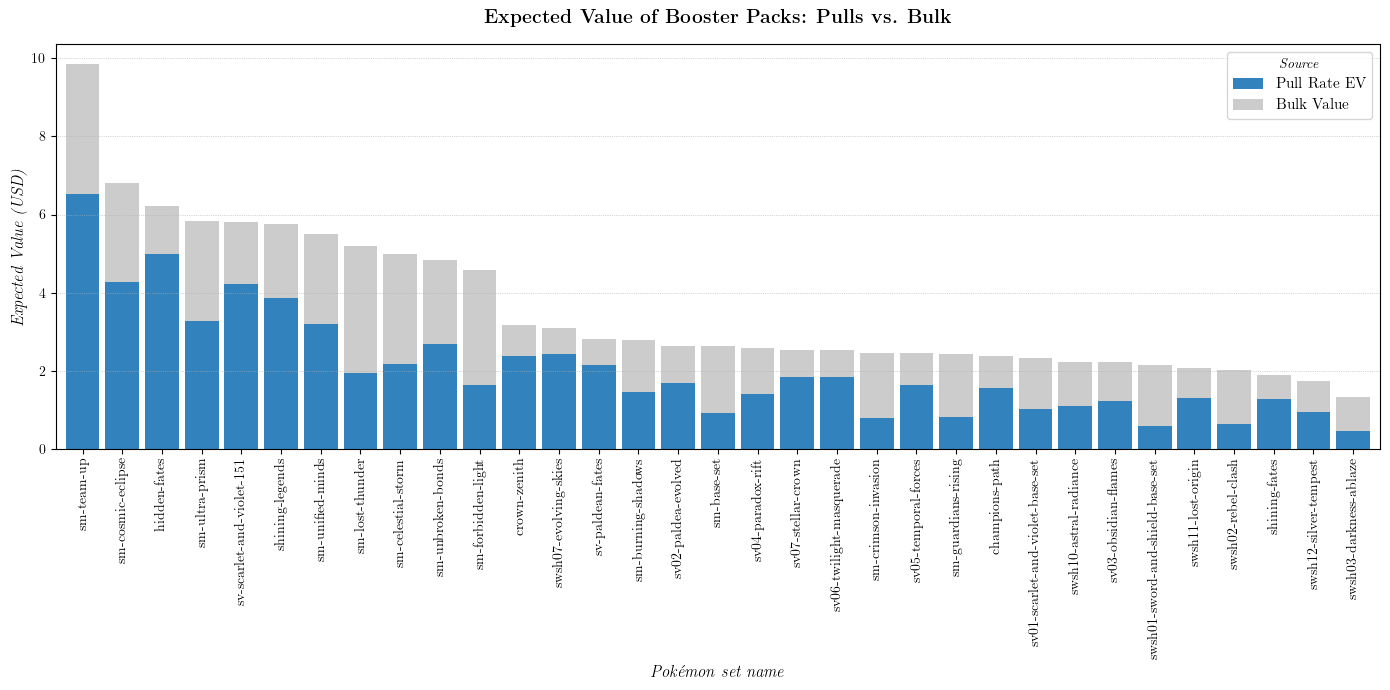

In [28]:
# Create value DataFrame

df = booster_pack_values_detailed_final2.copy()
value_df = df[['set_name_grouped', 'pull_rate_value', 'bulk_value_formula']].set_index('set_name_grouped')
value_df = value_df.loc[df.sort_values('expected_value_formula', ascending=False)['set_name_grouped']]

# Plot
fig, ax = plt.subplots(figsize=(14, 7))

value_df.plot(kind='bar', stacked=True, color=['#3182bd', '#cccccc'], ax=ax, width=0.85)

ax.set_title(r'\textbf{Expected Value of Booster Packs: Pulls vs. Bulk}', pad=15)
ax.set_ylabel(r'\textit{Expected Value (USD)}')
ax.set_xlabel(r'\textit{Pok\'emon set name}')
ax.legend(['Pull Rate EV', 'Bulk Value'], title=r'\textit{Source}', loc='upper right')
ax.grid(axis='y', linestyle=':', linewidth=0.5)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## now check the variability of total pull rates probability for the sets:

In [59]:
# Group by set and sum the pull probabilities
pull_prob_summary = (
    filtered_df[filtered_df['precise_pull'].notna()]
    .groupby('set_name_grouped')['precise_pull']
    .sum()
    .reset_index()
    .rename(columns={'precise_pull': 'total_pull_probability'})
)

# Subtract 1 from each set to remove code card effect
pull_prob_summary['total_pull_probability'] = pull_prob_summary['total_pull_probability'] - 1

# Optional: sort by release date if you already merged that
if 'release_date' in booster_pack_values_detailed_final2.columns:
    pull_prob_summary = pull_prob_summary.merge(
        booster_pack_values_detailed_final2[['set_name_grouped', 'release_date']],
        on='set_name_grouped',
        how='left'
    ).sort_values('release_date')


pull_prob_summary = pull_prob_summary.rename(columns={'set_name_grouped': 'set_name'})



cross_section_original_df = pd.read_excel('cross_section_final.xlsx')


merged_df = pull_prob_summary.merge(cross_section_original_df, on='set_name', how='left')
merged_df


,set_name,total_pull_probability,release_date_x,product_name,booster_price,expected_value,avg_top_5_price,release_date_y,set_age,is_special_set
0,sm-base-set,0.1765,2017-02-03,Sun & Moon Booster Pack,6.45,3.150060,34.336,2017-02-03,8.126027,0
1,sm-guardians-rising,0.1680,2017-05-05,Guardians Rising Booster Pack,10.39,3.433556,33.190,2017-05-05,7.876712,0
2,sm-burning-shadows,0.1742,2017-08-04,Burning Shadows Booster Pack,9.68,3.524877,118.276,2017-08-04,7.627397,0
3,shining-legends,0.2695,2017-10-06,Shining Legends Booster Pack,30.44,6.988347,59.372,2017-10-06,7.454795,1
4,sm-crimson-invasion,0.1497,2017-11-03,Crimson Invasion Booster Pack,6.42,3.673729,23.544,2017-11-03,7.378082,0
5,sm-ultra-prism,0.2329,2018-02-02,Ultra Prism Booster Pack,18.33,7.587501,161.272,2018-02-02,7.128767,0
6,sm-forbidden-light,0.2096,2018-05-04,Forbidden Light Booster Pack,15.49,6.922504,42.276,2018-05-04,6.879452,0
7,sm-celestial-storm,0.2169,2018-08-03,Celestial Storm Booster Pack,18.29,6.941998,100.690,2018-08-03,6.630137,0
8,sm-lost-thunder,0.2920,2018-11-02,Lost Thunder Booster Pack,14.96,8.315090,80.544,2018-11-02,6.380822,0
9,sm-team-up,0.2179,2019-02-01,Team Up Booster Pack,53.27,12.365701,344.944,2019-02-01,6.131507,0


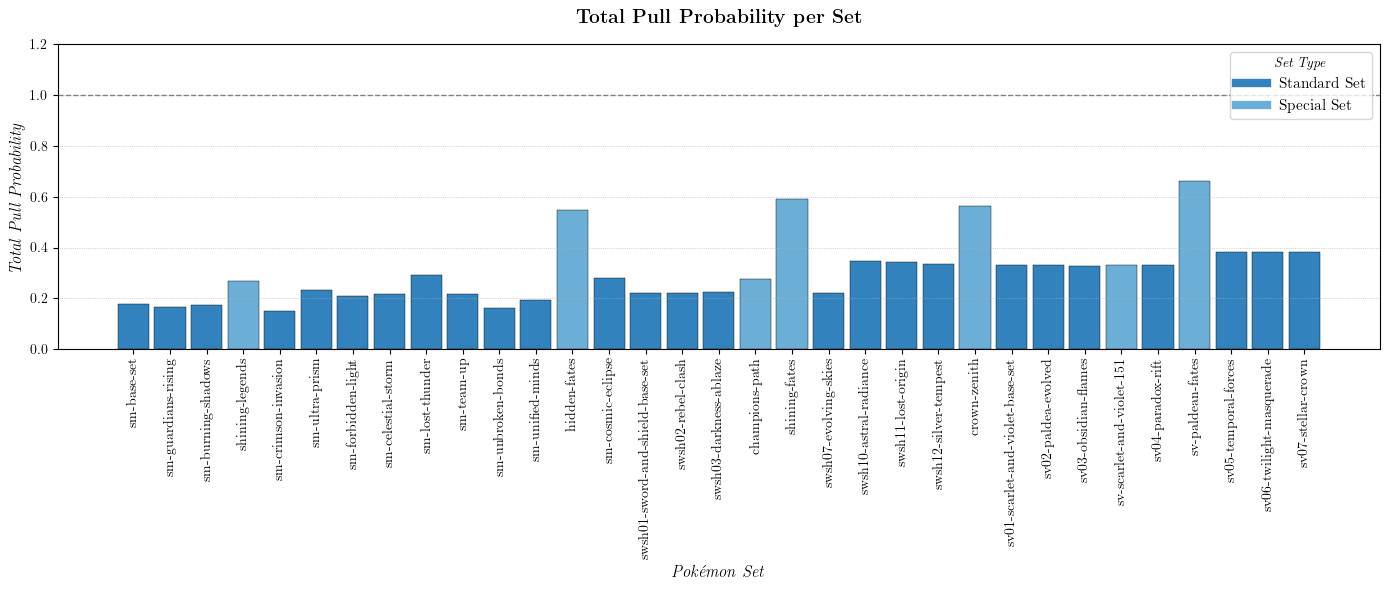

In [30]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# LaTeX-friendly style
mpl.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "axes.labelsize": 12,
    "axes.titlesize": 14,
    "legend.fontsize": 11,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
})

# Make sure your DataFrame has 'is_special_set' and is sorted by release
df = merged_df.copy()
df = df.sort_values('release_date_x')

# Create colors (slightly different for special sets)
colors = df['is_special_set'].map(lambda x: '#6baed6' if x == 1 else '#3182bd')  # lighter blue for special sets

# Plot
fig, ax = plt.subplots(figsize=(14, 6))
bars = ax.bar(
    df['set_name'],
    df['total_pull_probability'],
    color=colors,
    width=0.85,
    edgecolor='black',
    linewidth=0.3
)

# Title and labels
ax.set_title(r'\textbf{Total Pull Probability per Set}', pad=15)
ax.set_ylabel(r'\textit{Total Pull Probability}')
ax.set_xlabel(r'\textit{Pok\'emon Set}')
ax.set_ylim(0, 1.2)
ax.axhline(1, color='gray', linestyle='--', linewidth=1, label=r'\textit{Max Probability = 1}')
ax.legend(handles=[
    plt.Line2D([0], [0], color='#3182bd', lw=6, label='Standard Set'),
    plt.Line2D([0], [0], color='#6baed6', lw=6, label='Special Set')
], loc='upper right', title=r'\textit{Set Type}')

# Grid and layout
ax.grid(axis='y', linestyle=':', linewidth=0.5)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



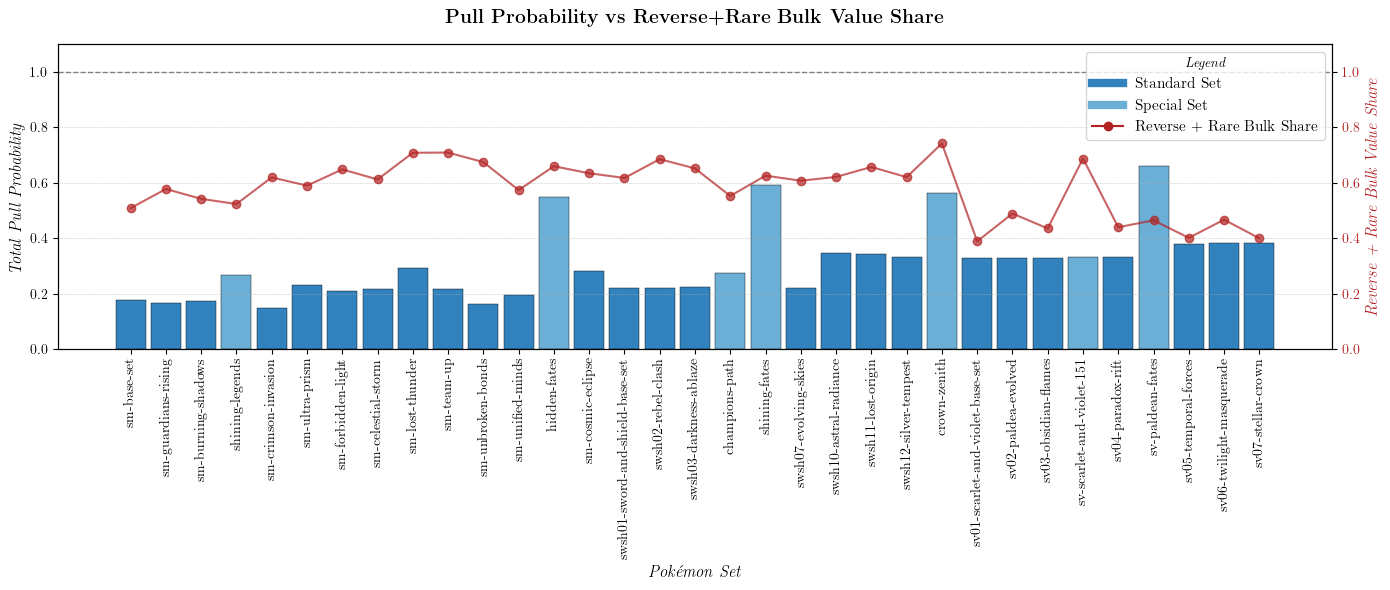

In [60]:
# STEP 1: Compute reverse + rare contributions
reverse_plus_rare = (
    df_normalized[['Reverse Common', 'Reverse Uncommon', 'Reverse Rare',
                   'Rare Non-Holo', 'Rare Holofoil']].sum(axis=1)
)

# STEP 2: Make sure it's a column in your main plotting df (merged_df)
merged_df = merged_df.set_index('set_name')
merged_df['reverse_plus_rare_share'] = reverse_plus_rare
merged_df = merged_df.reset_index()

# Sort again if needed
merged_df = merged_df.sort_values('release_date_x')


fig, ax1 = plt.subplots(figsize=(14, 6))

# Primary y-axis: Bar chart for total pull probability
colors = merged_df['is_special_set'].map(lambda x: '#6baed6' if x == 1 else '#3182bd')
bars = ax1.bar(
    merged_df['set_name'],
    merged_df['total_pull_probability'],
    color=colors,
    width=0.85,
    edgecolor='black',
    linewidth=0.3
)

# X-axis positioning
x = range(len(df))
x_labels = df['set_name']

# Primary axis settings
ax1.set_ylabel(r'\textit{Total Pull Probability}', color='black')
ax1.set_xlabel(r'\textit{Pok\'emon Set}')
ax1.set_ylim(0, 1.1)
ax1.axhline(1, color='gray', linestyle='--', linewidth=1, label=r'\textit{Max Probability = 1}')
ax1.tick_params(axis='y', labelcolor='black')


# Secondary y-axis: Line chart for reverse + rare bulk share
ax2 = ax1.twinx()
ax2.plot(
    merged_df['set_name'],
    merged_df['reverse_plus_rare_share'],
    color='firebrick',
    marker='o',
    linestyle='-',
    linewidth=1.5,
    alpha=0.7,
    label=r'\textit{Reverse + Rare Bulk Share}'
)
ax2.set_ylabel(r'\textit{Reverse + Rare Bulk Value Share}', color='firebrick')
ax2.tick_params(axis='y', labelcolor='firebrick')
ax2.set_ylim(0, 1.1)

# Title
ax1.set_title(r'\textbf{Pull Probability vs Reverse+Rare Bulk Value Share}', pad=15)

# Legend
lines1 = [
    plt.Line2D([0], [0], color='#3182bd', lw=6, label='Standard Set'),
    plt.Line2D([0], [0], color='#6baed6', lw=6, label='Special Set')
]
lines2 = [
    plt.Line2D([0], [0], color='firebrick', marker='o', label='Reverse + Rare Bulk Share', linestyle='-')
]
ax2.legend(handles=lines1 + lines2, loc='upper right', title=r'\textit{Legend}')


# X-axis ticks
ax1.set_xticks(x)
ax1.set_xticklabels(x_labels, rotation=90)

# Grid, ticks, layout
ax1.grid(axis='y', linestyle=':', linewidth=0.5)


plt.tight_layout()
plt.show()


Pearson correlation: -0.1332 (p = 4.5983e-01)
Spearman correlation: -0.1096 (p = 5.4365e-01)


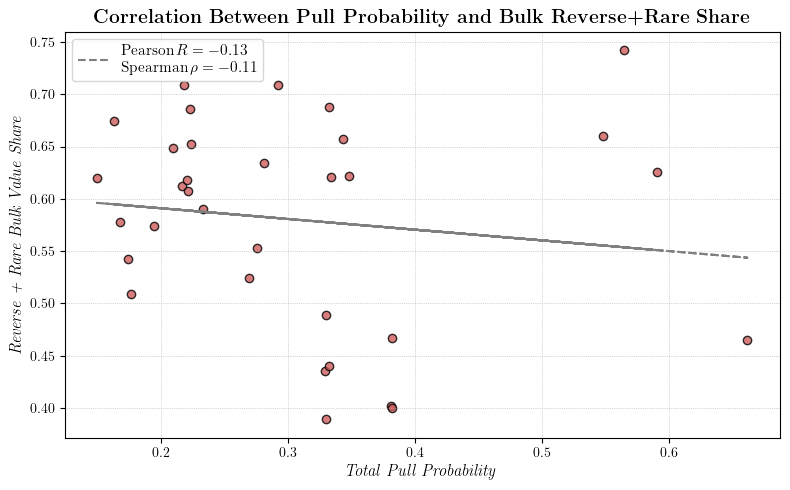

In [32]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
import numpy as np

# Extract data
x = merged_df['total_pull_probability']
y = merged_df['reverse_plus_rare_share']

# Pearson correlation
pearson_corr, pearson_p = pearsonr(x, y)

# Spearman correlation
spearman_corr, spearman_p = spearmanr(x, y)

print(f"Pearson correlation: {pearson_corr:.4f} (p = {pearson_p:.4e})")
print(f"Spearman correlation: {spearman_corr:.4f} (p = {spearman_p:.4e})")

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(x, y, color='indianred', edgecolor='black', alpha=0.8)
plt.title(r'\textbf{Correlation Between Pull Probability and Bulk Reverse+Rare Share}')
plt.xlabel(r'\textit{Total Pull Probability}')
plt.ylabel(r'\textit{Reverse + Rare Bulk Value Share}')
plt.grid(True, linestyle=':', linewidth=0.5)

# Regression line (based on Pearson correlation / linear fit)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m * x + b, color='gray', linestyle='--',
         label=fr'$\mathrm{{Pearson}}\, R = {pearson_corr:.2f}$' + '\n' +
               fr'$\mathrm{{Spearman}}\, \rho = {spearman_corr:.2f}$')

plt.legend()
plt.tight_layout()
plt.show()


Correlation Results:
All Sets:     Pearson R = -0.1332 (p = 4.5983e-01), Spearman ρ = -0.1096 (p = 5.4365e-01)
Standard Sets: Pearson R = -0.5326 (p = 5.0964e-03), Spearman ρ = -0.3231 (p = 1.0743e-01)
Special Sets:  Pearson R = 0.0832 (p = 8.5917e-01), Spearman ρ = 0.0000 (p = 1.0000e+00)


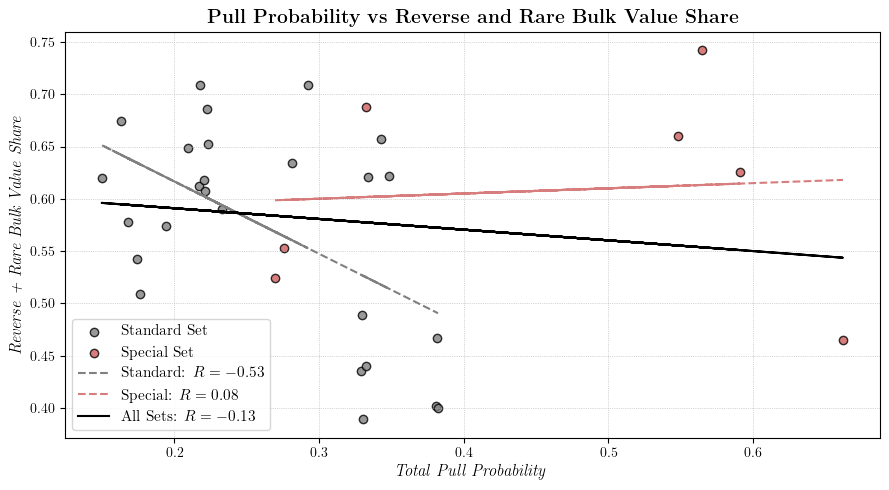

In [33]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
import numpy as np

# Separate into standard and special sets
standard = merged_df[merged_df['is_special_set'] == 0]
special = merged_df[merged_df['is_special_set'] == 1]

# Extract combined data
x_all = merged_df['total_pull_probability']
y_all = merged_df['reverse_plus_rare_share']

# Pearson and Spearman correlations
pearson_all, p_all = pearsonr(x_all, y_all)
spearman_all, sp_all = spearmanr(x_all, y_all)

pearson_std, p_std = pearsonr(standard['total_pull_probability'], standard['reverse_plus_rare_share'])
spearman_std, sp_std = spearmanr(standard['total_pull_probability'], standard['reverse_plus_rare_share'])

pearson_spec, p_spec = pearsonr(special['total_pull_probability'], special['reverse_plus_rare_share'])
spearman_spec, sp_spec = spearmanr(special['total_pull_probability'], special['reverse_plus_rare_share'])

# ---- PRINT RESULTS ----
print("Correlation Results:")
print(f"All Sets:     Pearson R = {pearson_all:.4f} (p = {p_all:.4e}), Spearman ρ = {spearman_all:.4f} (p = {sp_all:.4e})")
print(f"Standard Sets: Pearson R = {pearson_std:.4f} (p = {p_std:.4e}), Spearman ρ = {spearman_std:.4f} (p = {sp_std:.4e})")
print(f"Special Sets:  Pearson R = {pearson_spec:.4f} (p = {p_spec:.4e}), Spearman ρ = {spearman_spec:.4f} (p = {sp_spec:.4e})")

# ---- PLOT ----
plt.figure(figsize=(9, 5))

# Scatter plot – red for standard, blue for special
plt.scatter(standard['total_pull_probability'], standard['reverse_plus_rare_share'],
            color='gray', edgecolor='black', alpha=0.8, label='Standard Set')
plt.scatter(special['total_pull_probability'], special['reverse_plus_rare_share'],
            color='indianred', edgecolor='black', alpha=0.8, label='Special Set')

# Regression line – standard sets
m_std, b_std = np.polyfit(standard['total_pull_probability'], standard['reverse_plus_rare_share'], 1)
plt.plot(standard['total_pull_probability'],
         m_std * standard['total_pull_probability'] + b_std,
         color='gray', linestyle='--',
         label=fr'Standard: $R={pearson_std:.2f}$')

# Regression line – special sets
m_spec, b_spec = np.polyfit(special['total_pull_probability'], special['reverse_plus_rare_share'], 1)
plt.plot(special['total_pull_probability'],
         m_spec * special['total_pull_probability'] + b_spec,
         color='indianred', linestyle='--',
         alpha=0.8,
         label=fr'Special: $R={pearson_spec:.2f}$')

# Regression line – all sets
m_all, b_all = np.polyfit(x_all, y_all, 1)
plt.plot(x_all, m_all * x_all + b_all, color='black', linestyle='-', linewidth=1.5,
         label=fr'All Sets: $R={pearson_all:.2f}$')

# Aesthetics
plt.title(r'\textbf{Pull Probability vs Reverse and Rare Bulk Value Share}')
plt.xlabel(r'\textit{Total Pull Probability}')
plt.ylabel(r'\textit{Reverse + Rare Bulk Value Share}')
plt.grid(True, linestyle=':', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()


#### regression as a final check:

In [34]:
import statsmodels.api as sm

# Prepare the data
df_reg = merged_df[['reverse_plus_rare_share', 'total_pull_probability', 'is_special_set']].dropna()

# Define dependent and independent variables
X = df_reg[['total_pull_probability', 'is_special_set']]
X = sm.add_constant(X)  # adds intercept (constant term)
y = df_reg['reverse_plus_rare_share']

# Fit the model
model = sm.OLS(y, X).fit()

# Display summary
print(model.summary())


                               OLS Regression Results                              
Dep. Variable:     reverse_plus_rare_share   R-squared:                       0.113
Model:                                 OLS   Adj. R-squared:                  0.053
Method:                      Least Squares   F-statistic:                     1.904
Date:                     Sun, 06 Apr 2025   Prob (F-statistic):              0.167
Time:                             11:51:17   Log-Likelihood:                 32.021
No. Observations:                       33   AIC:                            -58.04
Df Residuals:                           30   BIC:                            -53.55
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

In [36]:
df_reg['interaction'] = df_reg['total_pull_probability'] * df_reg['is_special_set']
X = df_reg[['total_pull_probability', 'is_special_set', 'interaction']]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


!pip install stargazer
from stargazer.stargazer import Stargazer
from IPython.display import display, Latex

stargazer = Stargazer([model])
print(stargazer.render_latex())



                               OLS Regression Results                              
Dep. Variable:     reverse_plus_rare_share   R-squared:                       0.248
Model:                                 OLS   Adj. R-squared:                  0.171
Method:                      Least Squares   F-statistic:                     3.194
Date:                     Sun, 06 Apr 2025   Prob (F-statistic):             0.0381
Time:                             11:51:59   Log-Likelihood:                 34.760
No. Observations:                       33   AIC:                            -61.52
Df Residuals:                           29   BIC:                            -55.53
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\janhr\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


#### final analysis  
(including the correct set_age, and selected figures and models)

In [37]:
!pip install statsmodels

import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\janhr\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [41]:
cross_section_final1 = pd.read_excel('cross_section_final.xlsx')


### Correct the set_age:

#### use the reference_date when the data was scraped (both cards and booster prices):

(! using 365.25 to account for leap years!)

In [57]:
import pandas as pd
from datetime import datetime


# Convert 'release_date' to datetime format
cross_section_final1["release_date"] = pd.to_datetime(cross_section_final1["release_date"], errors="coerce")


# Set the dataset creation date (October 7, 2024)
reference_date = pd.to_datetime("07.10.2024", dayfirst=True)
print(reference_date)

# Calculate age of the set in years
cross_section_final1["set_age"] = (reference_date - cross_section_final1["release_date"]).dt.days / 365.25  # Convert days to years

cross_section_final1 = cross_section_final1.rename(columns={'expected_value': 'expected_value_original'})


cross_section_final1

2024-10-07 00:00:00


,product_name,booster_price,set_name,expected_value_original,avg_top_5_price,release_date,set_age,is_special_set
0,Champion's Path Booster Pack,8.56,champions-path,2.987305,65.884,2020-09-25,4.032854,1
1,Crown Zenith Booster Pack,3.98,crown-zenith,4.064795,59.564,2023-01-20,1.713895,1
2,Hidden Fates Booster Pack,19.96,hidden-fates,7.267429,161.866,2019-08-23,5.125257,1
3,Shining Fates Booster Pack,4.88,shining-fates,2.439886,21.472,2021-02-19,3.630390,1
4,Shining Legends Booster Pack,30.44,shining-legends,6.988347,59.372,2017-10-06,7.003422,1
5,Sun & Moon Booster Pack,6.45,sm-base-set,3.150060,34.336,2017-02-03,7.674196,0
6,Burning Shadows Booster Pack,9.68,sm-burning-shadows,3.524877,118.276,2017-08-04,7.175907,0
7,Celestial Storm Booster Pack,18.29,sm-celestial-storm,6.941998,100.690,2018-08-03,6.179329,0
8,Cosmic Eclipse Booster Pack,19.53,sm-cosmic-eclipse,8.871870,148.622,2019-11-01,4.933607,0
9,Crimson Invasion Booster Pack,6.42,sm-crimson-invasion,3.673729,23.544,2017-11-03,6.926762,0


### now, merge with the correct dataframes (from the  correct EV calculation analysis above) so far:

In [61]:
merged_df ## no no, new dataframe needs to be created including the decomposition of the EV into pulls and bulk, and correct EV... and correct set_age!
merged_df1 = merged_df.copy()
merged_df1 = merged_df1.drop(columns=[
    'release_date_x', 'product_name', 'booster_price', 'expected_value',
    'avg_top_5_price', 'release_date_y', 'set_age', 'is_special_set',
    'reverse_plus_rare_share'
])
merged_df1

,set_name,total_pull_probability
0,sm-base-set,0.1765
1,sm-guardians-rising,0.1680
2,sm-burning-shadows,0.1742
3,shining-legends,0.2695
4,sm-crimson-invasion,0.1497
5,sm-ultra-prism,0.2329
6,sm-forbidden-light,0.2096
7,sm-celestial-storm,0.2169
8,sm-lost-thunder,0.2920
9,sm-team-up,0.2179


In [56]:
df1 = booster_pack_values_detailed_final2.copy()
value_df1 = df1[['set_name_grouped', 'pull_rate_value', 'bulk_value_formula']]
value_df1 = value_df1.rename(columns={'set_name_grouped': 'set_name'})
value_df1

,set_name,pull_rate_value,bulk_value_formula
0,champions-path,1.568787,0.827724
1,crown-zenith,2.377514,0.800752
2,hidden-fates,5.004036,1.204702
3,shining-fates,1.271408,0.638562
4,shining-legends,3.877514,1.889286
5,sm-base-set,0.920801,1.721937
6,sm-burning-shadows,1.464964,1.331298
7,sm-celestial-storm,2.183239,2.812959
8,sm-cosmic-eclipse,4.272906,2.533168
9,sm-crimson-invasion,0.798729,1.655115


### merge all three datasets and create new expected_value column:

In [66]:
# Step 1: Merge cross_section_final1 with merged_df
merged_all = pd.merge(cross_section_final1, merged_df1, on='set_name', how='inner')

# Step 2: Merge the result with value_df1
merged_dataset = pd.merge(merged_all, value_df1, on='set_name', how='inner')


merged_dataset = merged_dataset.rename(columns={'bulk_value_formula': 'bulk_value'})

merged_dataset['expected_value'] = merged_dataset['pull_rate_value'] + merged_dataset['bulk_value']



merged_dataset.to_excel('cross_section_final_CORRECT_with_original_EV.xlsx')

merged_dataset

,product_name,booster_price,set_name,expected_value_original,avg_top_5_price,release_date,set_age,is_special_set,total_pull_probability,pull_rate_value,bulk_value,expected_value
0,Champion's Path Booster Pack,8.56,champions-path,2.987305,65.884,2020-09-25,4.032854,1,0.2756,1.568787,0.827724,2.396511
1,Crown Zenith Booster Pack,3.98,crown-zenith,4.064795,59.564,2023-01-20,1.713895,1,0.5645,2.377514,0.800752,3.178266
2,Hidden Fates Booster Pack,19.96,hidden-fates,7.267429,161.866,2019-08-23,5.125257,1,0.5481,5.004036,1.204702,6.208739
3,Shining Fates Booster Pack,4.88,shining-fates,2.439886,21.472,2021-02-19,3.630390,1,0.5907,1.271408,0.638562,1.909970
4,Shining Legends Booster Pack,30.44,shining-legends,6.988347,59.372,2017-10-06,7.003422,1,0.2695,3.877514,1.889286,5.766799
5,Sun & Moon Booster Pack,6.45,sm-base-set,3.150060,34.336,2017-02-03,7.674196,0,0.1765,0.920801,1.721937,2.642738
6,Burning Shadows Booster Pack,9.68,sm-burning-shadows,3.524877,118.276,2017-08-04,7.175907,0,0.1742,1.464964,1.331298,2.796261
7,Celestial Storm Booster Pack,18.29,sm-celestial-storm,6.941998,100.690,2018-08-03,6.179329,0,0.2169,2.183239,2.812959,4.996197
8,Cosmic Eclipse Booster Pack,19.53,sm-cosmic-eclipse,8.871870,148.622,2019-11-01,4.933607,0,0.2810,4.272906,2.533168,6.806074
9,Crimson Invasion Booster Pack,6.42,sm-crimson-invasion,3.673729,23.544,2017-11-03,6.926762,0,0.1497,0.798729,1.655115,2.453844


### Save the FINAL DATASET used for the cross section analysis:

In [68]:
cross_section_final_correct = merged_dataset.drop(columns='expected_value_original')

cross_section_final_correct.to_excel('cross_section_final_correct.xlsx')

cross_section_final_correct


,product_name,booster_price,set_name,avg_top_5_price,release_date,set_age,is_special_set,total_pull_probability,pull_rate_value,bulk_value,expected_value
0,Champion's Path Booster Pack,8.56,champions-path,65.884,2020-09-25,4.032854,1,0.2756,1.568787,0.827724,2.396511
1,Crown Zenith Booster Pack,3.98,crown-zenith,59.564,2023-01-20,1.713895,1,0.5645,2.377514,0.800752,3.178266
2,Hidden Fates Booster Pack,19.96,hidden-fates,161.866,2019-08-23,5.125257,1,0.5481,5.004036,1.204702,6.208739
3,Shining Fates Booster Pack,4.88,shining-fates,21.472,2021-02-19,3.630390,1,0.5907,1.271408,0.638562,1.909970
4,Shining Legends Booster Pack,30.44,shining-legends,59.372,2017-10-06,7.003422,1,0.2695,3.877514,1.889286,5.766799
5,Sun & Moon Booster Pack,6.45,sm-base-set,34.336,2017-02-03,7.674196,0,0.1765,0.920801,1.721937,2.642738
6,Burning Shadows Booster Pack,9.68,sm-burning-shadows,118.276,2017-08-04,7.175907,0,0.1742,1.464964,1.331298,2.796261
7,Celestial Storm Booster Pack,18.29,sm-celestial-storm,100.690,2018-08-03,6.179329,0,0.2169,2.183239,2.812959,4.996197
8,Cosmic Eclipse Booster Pack,19.53,sm-cosmic-eclipse,148.622,2019-11-01,4.933607,0,0.2810,4.272906,2.533168,6.806074
9,Crimson Invasion Booster Pack,6.42,sm-crimson-invasion,23.544,2017-11-03,6.926762,0,0.1497,0.798729,1.655115,2.453844


## now check for the top5average variable:

In [102]:
filtered_df1 = filtered_df.copy()

filtered_df1

,card_name,card_link,image_link,printing,condition,rarity,card_number,price,set_name,imprecise_pull,precise_pull,set_name_grouped,release_date
0,Code Card - Champion's Path Booster Pack,/product/251544/pokemon-champion-s-path-code-c...,https://tcgplayer-cdn.tcgplayer.com/product/25...,Normal,Near Mint,Code Card,NaN,0.06,champions-path,1.0,1.0,champions-path,2020-09-25
1,Weedle,/product/222995/pokemon-champion-s-path-weedle,https://tcgplayer-cdn.tcgplayer.com/product/22...,Normal,Near Mint,Common,02/73,0.07,champions-path,NaN,NaN,champions-path,2020-09-25
2,Weedle,/product/222995/pokemon-champion-s-path-weedle,https://tcgplayer-cdn.tcgplayer.com/product/22...,Reverse Holofoil,Near Mint,Common,02/73,0.22,champions-path,NaN,NaN,champions-path,2020-09-25
3,Kakuna,/product/222997/pokemon-champion-s-path-kakuna,https://tcgplayer-cdn.tcgplayer.com/product/22...,Normal,Near Mint,Common,03/73,0.04,champions-path,NaN,NaN,champions-path,2020-09-25
4,Kakuna,/product/222997/pokemon-champion-s-path-kakuna,https://tcgplayer-cdn.tcgplayer.com/product/22...,Reverse Holofoil,Near Mint,Common,03/73,0.17,champions-path,NaN,NaN,champions-path,2020-09-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11280,Worker,/product/451815/pokemon-swsh12-silver-tempest-...,https://tcgplayer-cdn.tcgplayer.com/product/45...,Reverse Holofoil,Near Mint,Uncommon,167/195,0.26,swsh12-silver-tempest,NaN,NaN,swsh12-silver-tempest,2022-11-11
11281,Regenerative Energy,/product/451816/pokemon-swsh12-silver-tempest-...,https://tcgplayer-cdn.tcgplayer.com/product/45...,Normal,Near Mint,Uncommon,168/195,0.09,swsh12-silver-tempest,NaN,NaN,swsh12-silver-tempest,2022-11-11
11282,Regenerative Energy,/product/451816/pokemon-swsh12-silver-tempest-...,https://tcgplayer-cdn.tcgplayer.com/product/45...,Reverse Holofoil,Near Mint,Uncommon,168/195,0.10,swsh12-silver-tempest,NaN,NaN,swsh12-silver-tempest,2022-11-11
11283,V Guard Energy,/product/451817/pokemon-swsh12-silver-tempest-...,https://tcgplayer-cdn.tcgplayer.com/product/45...,Normal,Near Mint,Uncommon,169/195,0.09,swsh12-silver-tempest,NaN,NaN,swsh12-silver-tempest,2022-11-11


#### just check the relationship between the pull probability of a card and its price:
##### (likely ommit completely...)

In [71]:
df_corr = filtered_df1[
    (filtered_df1['precise_pull'].notna()) &
    (filtered_df1['precise_pull'] != 1)
]

df_corr

,card_name,card_link,image_link,printing,condition,rarity,card_number,price,set_name,imprecise_pull,precise_pull,set_name_grouped,release_date
63,Charizard VMAX (Secret),/product/223073/pokemon-champion-s-path-chariz...,https://tcgplayer-cdn.tcgplayer.com/product/22...,Holofoil,Near Mint,Secret Rare,74/73,151.29,champions-path,NaN,0.003140,champions-path,2020-09-25
64,Drednaw VMAX (Secret),/product/223074/pokemon-champion-s-path-dredna...,https://tcgplayer-cdn.tcgplayer.com/product/22...,Holofoil,Near Mint,Secret Rare,75/73,6.33,champions-path,NaN,0.003140,champions-path,2020-09-25
65,Gardevoir VMAX (Secret),/product/223075/pokemon-champion-s-path-gardev...,https://tcgplayer-cdn.tcgplayer.com/product/22...,Holofoil,Near Mint,Secret Rare,76/73,7.16,champions-path,NaN,0.003140,champions-path,2020-09-25
66,Kabu (Secret),/product/223076/pokemon-champion-s-path-kabu-s...,https://tcgplayer-cdn.tcgplayer.com/product/22...,Holofoil,Near Mint,Secret Rare,77/73,2.85,champions-path,NaN,0.003140,champions-path,2020-09-25
67,Piers (Secret),/product/223077/pokemon-champion-s-path-piers-...,https://tcgplayer-cdn.tcgplayer.com/product/22...,Holofoil,Near Mint,Secret Rare,78/73,2.95,champions-path,NaN,0.003140,champions-path,2020-09-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11168,Gym Trainer (Full Art),/product/451839/pokemon-swsh12-silver-tempest-...,https://tcgplayer-cdn.tcgplayer.com/product/45...,Holofoil,Near Mint,Ultra Rare,191/195,0.93,swsh12-silver-tempest,NaN,0.001414,swsh12-silver-tempest,2022-11-11
11169,Lance (Full Art),/product/451840/pokemon-swsh12-silver-tempest-...,https://tcgplayer-cdn.tcgplayer.com/product/45...,Holofoil,Near Mint,Ultra Rare,192/195,2.50,swsh12-silver-tempest,NaN,0.001414,swsh12-silver-tempest,2022-11-11
11170,Serena (Full Art),/product/451841/pokemon-swsh12-silver-tempest-...,https://tcgplayer-cdn.tcgplayer.com/product/45...,Holofoil,Near Mint,Ultra Rare,193/195,7.88,swsh12-silver-tempest,NaN,0.001414,swsh12-silver-tempest,2022-11-11
11171,Wallace (Full Art),/product/451842/pokemon-swsh12-silver-tempest-...,https://tcgplayer-cdn.tcgplayer.com/product/45...,Holofoil,Near Mint,Ultra Rare,194/195,4.18,swsh12-silver-tempest,NaN,0.001414,swsh12-silver-tempest,2022-11-11


In [72]:
from scipy.stats import pearsonr, spearmanr

x = df_corr['precise_pull']
y = df_corr['price']

pearson_corr, pearson_p = pearsonr(x, y)
spearman_corr, spearman_p = spearmanr(x, y)

print(f"Pearson correlation: {pearson_corr:.4f} (p = {pearson_p:.4e})")
print(f"Spearman correlation: {spearman_corr:.4f} (p = {spearman_p:.4e})")


Pearson correlation: -0.1565 (p = 2.0692e-14)
Spearman correlation: -0.5683 (p = 4.4497e-202)


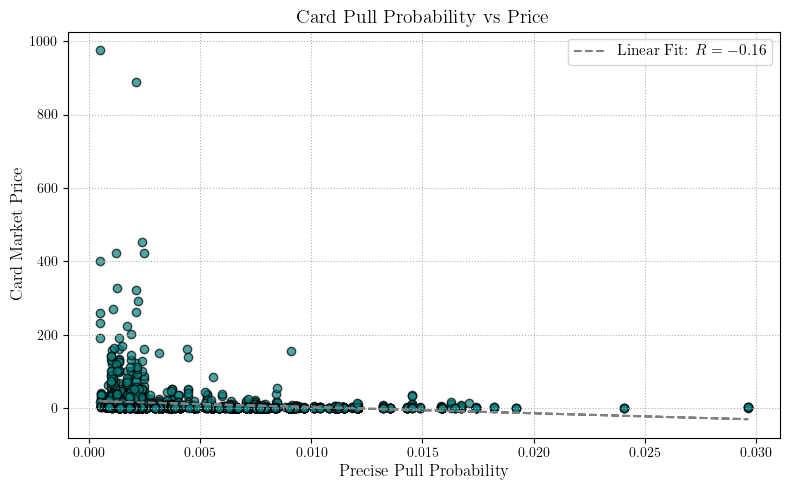

In [75]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 5))
plt.scatter(x, y, color='teal', edgecolor='black', alpha=0.7)
plt.title('Card Pull Probability vs Price')
plt.xlabel('Precise Pull Probability')
plt.ylabel('Card Market Price')
plt.grid(True, linestyle=':')

# Add regression line
m, b = np.polyfit(x, y, 1)
plt.plot(x, m * x + b, color='gray', linestyle='--', label=f'Linear Fit: $R={pearson_corr:.2f}$')
plt.legend()
plt.tight_layout()
plt.show()


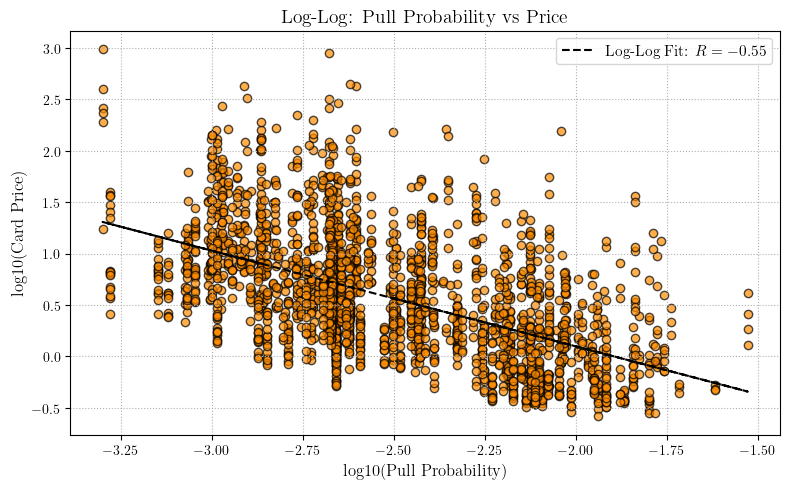

Log-Log Slope = -0.93, Intercept = -1.77


In [76]:
##log-log:

log_x = np.log10(x[x > 0])  # avoid log(0)
log_y = np.log10(y[x > 0])  # only take log of matching y

slope, intercept = np.polyfit(log_x, log_y, 1)
r_log, _ = pearsonr(log_x, log_y)

plt.figure(figsize=(8, 5))
plt.scatter(log_x, log_y, color='darkorange', edgecolor='black', alpha=0.7)
plt.plot(log_x, slope * log_x + intercept, '--', color='black', label=f'Log-Log Fit: $R={r_log:.2f}$')
plt.title('Log-Log: Pull Probability vs Price')
plt.xlabel('log10(Pull Probability)')
plt.ylabel('log10(Card Price)')
plt.legend()
plt.grid(True, linestyle=':')
plt.tight_layout()
plt.show()

print(f"Log-Log Slope = {slope:.2f}, Intercept = {intercept:.2f}")


In [ ]:
# regression of what determines the price of a card...:
# not working with precise pull - multicollinearity possibly with the rarities - not important - just for maybe interesting insights
import pandas as pd
import statsmodels.api as sm


# Step 0: Remove Code Cards from the dataset
df_model = filtered_df1[filtered_df1['rarity'] != 'Code Card'].copy()

# Step 2: Merge in set-level attributes
df_model = df_model.merge(
    cross_section_final_correct[['set_name', 'set_age', 'is_special_set']],
    on='set_name',
    how='left'
)

# Step 3: Keep valid observations
df_model = df_model[
    #df_model['precise_pull'].notna() &
    df_model['price'].notna() &
    df_model['rarity'].notna() &
    df_model['set_age'].notna() &
    df_model['is_special_set'].notna()
].copy()

# Step 4: Convert boolean column to int
df_model['is_special_set'] = df_model['is_special_set'].astype(int)


# Step 4: Create dummy variables for rarity (excluding Code Card)
df_model = df_model[df_model['rarity'] != 'Code Card']
df_model = pd.get_dummies(df_model, columns=['rarity'], drop_first=True)


# Step 5: Create dummy variables for rarity
#df_model = pd.get_dummies(df_model, columns=['rarity'], drop_first=True)

# Step 6: Define X and y
X_cols = [ 'set_age', 'is_special_set'] + [col for col in df_model.columns if col.startswith('rarity_')]
X = df_model[X_cols]
y = df_model['price']

# Step 7: Convert all columns to numeric
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

# Step 8: Convert any boolean columns in X to int
bool_cols = X.select_dtypes(include='bool').columns
X[bool_cols] = X[bool_cols].astype(int)

# Step 9: Combine X and y, drop any remaining NaNs
combined = pd.concat([X, y], axis=1).dropna()
X = combined[X.columns]
y = combined[y.name]

# Step 10: Debugging check
print("\nX dtypes:")
print(X.dtypes)
print("\ny dtype:")
print(y.dtypes)

# Step 11: Add constant and fit model
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Step 12: Show results
print(model.summary())



X dtypes:
set_age                             float64
is_special_set                        int64
rarity_Amazing Rare                   int64
rarity_Common                         int64
rarity_Double Rare                    int64
rarity_Holo Rare                      int64
rarity_Hyper Rare                     int64
rarity_Illustration Rare              int64
rarity_Prism Rare                     int64
rarity_Radiant Rare                   int64
rarity_Rare                           int64
rarity_Secret Rare                    int64
rarity_Shiny Holo Rare                int64
rarity_Shiny Rare                     int64
rarity_Shiny Ultra Rare               int64
rarity_Special Illustration Rare      int64
rarity_Ultra Rare                     int64
rarity_Uncommon                       int64
dtype: object

y dtype:
float64
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.096
Model: 

## ...now check if pull probability is correlated with pull rate EV... 

##### (likely ommit completely)

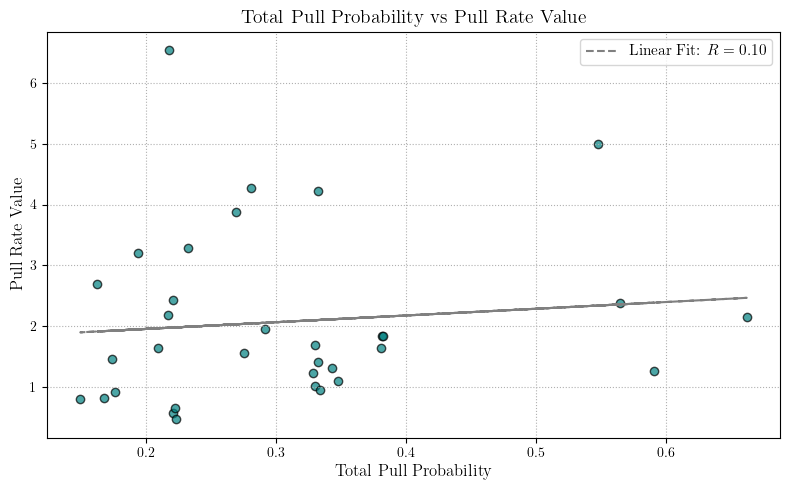

In [82]:
cross_section_final_correct

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

# Define your variables
x = cross_section_final_correct['total_pull_probability']
y = cross_section_final_correct['pull_rate_value']

# Calculate Pearson correlation and regression line
pearson_corr, _ = pearsonr(x, y)
m, b = np.polyfit(x, y, 1)

# Plot in your style
plt.figure(figsize=(8, 5))
plt.scatter(x, y, color='teal', edgecolor='black', alpha=0.7)
plt.title('Total Pull Probability vs Pull Rate Value')
plt.xlabel('Total Pull Probability')
plt.ylabel('Pull Rate Value')
plt.grid(True, linestyle=':')

# Regression line
plt.plot(x, m * x + b, color='gray', linestyle='--', label=f'Linear Fit: $R={pearson_corr:.2f}$')
plt.legend()
plt.tight_layout()
plt.show()



Log-Log Slope = 0.33, Intercept = 0.41


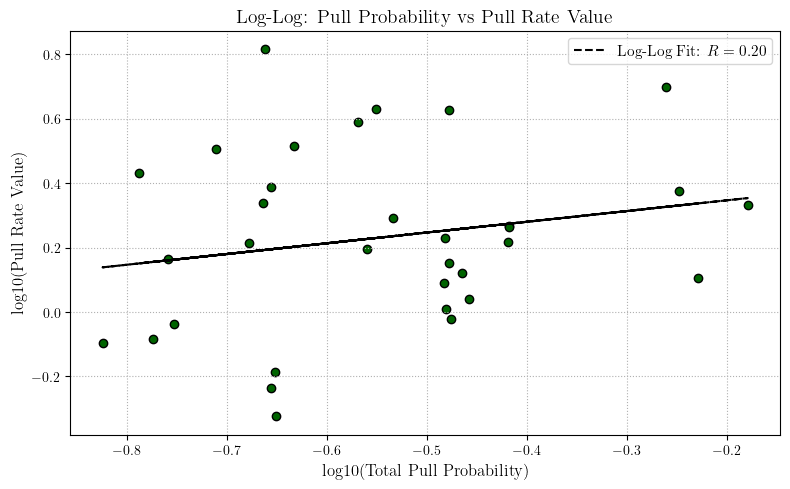

In [83]:
import numpy as np

# Only use positive values
log_x = np.log10(x[x > 0])
log_y = np.log10(y[x > 0])

slope, intercept = np.polyfit(log_x, log_y, 1)
print(f"Log-Log Slope = {slope:.2f}, Intercept = {intercept:.2f}")

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(log_x, log_y, color='darkgreen', edgecolor='black')
plt.plot(log_x, slope * log_x + intercept, '--', color='black', label=f'Log-Log Fit: $R={pearsonr(log_x, log_y)[0]:.2f}$')
plt.xlabel('log10(Total Pull Probability)')
plt.ylabel('log10(Pull Rate Value)')
plt.title('Log-Log: Pull Probability vs Pull Rate Value')
plt.legend()
plt.grid(True, linestyle=':')
plt.tight_layout()
plt.show()


## Now, definitely check the averagetop5price:

### Summary stats: 

In [ ]:
summary_stats = cross_section_final[["booster_price", "expected_value", "avg_top_5_price", "set_age", "is_special_set"]].describe()
print(summary_stats)


In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.collections as mcoll  # Correct import for PathCollection

# Create the pairplot (without trendlines initially)
g = sns.pairplot(
    cross_section_final[["booster_price", "expected_value", "avg_top_5_price", "set_age", "is_special_set"]],
    plot_kws={'alpha': 0.6}  # Keeps the original look
)

# Add trendlines manually with a more subtle appearance
for ax in g.axes.flat:
    if ax is not None:
        # Extract scatter plot points
        scatter_points = [p for p in ax.collections if isinstance(p, mcoll.PathCollection)]
        if scatter_points:
            x_values, y_values = scatter_points[0].get_offsets().T  # Get X and Y data points

            if len(x_values) > 1:  # Ensure enough points for a trendline
                # Fit a simple linear regression (trendline)
                m, b = np.polyfit(x_values, y_values, 1)
                ax.plot(x_values, m * x_values + b, color='gray', linestyle='-', linewidth=1)  # Thin, solid gray line

# Show the modified pairplot
plt.show()



In [ ]:
# Define independent variables
X = cross_section_final[["expected_value", "avg_top_5_price", "set_age", "is_special_set"]]
X = sm.add_constant(X)  # Add constant for VIF calculation

# Compute VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print VIF values
print(vif_data)


In [ ]:
import statsmodels.api as sm
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
import seaborn as sns

# Define dependent and independent variables
y = cross_section_final["booster_price"]
X = cross_section_final[["expected_value", "avg_top_5_price", "set_age", "is_special_set"]]
X = sm.add_constant(X)  # Add constant for regression model

# Fit OLS model
model = sm.OLS(y, X).fit()

# 1. Residual Plot (Visual Check)
residuals = model.resid
fitted_values = model.fittedvalues

plt.figure(figsize=(8, 5))
sns.scatterplot(x=fitted_values, y=residuals, alpha=0.6)
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot to Check for Heteroskedasticity")
plt.show()

# 2. Breusch-Pagan Test
bp_test = sms.het_breuschpagan(residuals, X)
bp_test_results = pd.DataFrame({
    "Test": ["Breusch-Pagan"],
    "LM Statistic": [bp_test[0]],
    "p-value": [bp_test[1]]
})

# 3. White's Test
white_test = sms.het_white(residuals, X)
white_test_results = pd.DataFrame({
    "Test": ["White"],
    "LM Statistic": [white_test[0]],
    "p-value": [white_test[1]]
})

# Combine results
heteroskedasticity_results = pd.concat([bp_test_results, white_test_results])

heteroskedasticity_results

## -> so there is heteroskedasticity

In [ ]:
# Define dependent and independent variables
y = cross_section_final["booster_price"]
X = cross_section_final[["expected_value", "avg_top_5_price", "set_age", "is_special_set"]]
X = sm.add_constant(X)  # Add constant for the regression model

# Run OLS regression
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())


In [ ]:
# Run OLS regression with robust standard errors
robust_model = sm.OLS(y, X).fit(cov_type='HC3')  # HC3 is more conservative but reliable

# Print the robust regression results
print(robust_model.summary())


In [ ]:
robust_model = sm.OLS(y, X).fit(cov_type='HC0')
print(robust_model.summary())


## very bad:

In [ ]:
import statsmodels.api as sm
import numpy as np

# Define dependent and independent variables
y = cross_section_final["booster_price"]
X = cross_section_final[["expected_value", "avg_top_5_price", "set_age", "is_special_set"]]
X = sm.add_constant(X)  # Add constant

# Step 1: Run initial OLS model to get residuals
initial_model = sm.OLS(y, X).fit()
residuals = initial_model.resid

# Step 2: Estimate variance of residuals
weights = 1 / (residuals**2)  # Inverse variance as weights (avoiding division by zero)

# Step 3: Fit WLS model
wls_model = sm.WLS(y, X, weights=weights).fit()

# Print WLS regression summary
print(wls_model.summary())


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 1️Boxplot to visualize outliers
plt.figure(figsize=(8, 4))
sns.boxplot(x=cross_section_final["booster_price"])
plt.title("Boxplot of Booster Price (Checking for Outliers)")
plt.show()

# 2️Histogram to check distribution
plt.figure(figsize=(8, 4))
sns.histplot(cross_section_final["booster_price"], bins=10, kde=True)
plt.title("Histogram of Booster Price")
plt.show()

# 3️Z-Score Method (Values > 3 or < -3 are Outliers)
cross_section_final["z_score"] = (cross_section_final["booster_price"] - cross_section_final["booster_price"].mean()) / cross_section_final["booster_price"].std()
z_outliers = cross_section_final[abs(cross_section_final["z_score"]) > 3]

# 4 IQR Method (Values outside 1.5 * IQR are Outliers)
Q1 = cross_section_final["booster_price"].quantile(0.25)
Q3 = cross_section_final["booster_price"].quantile(0.75)
IQR = Q3 - Q1

iqr_outliers = cross_section_final[
    (cross_section_final["booster_price"] < (Q1 - 1.5 * IQR)) | 
    (cross_section_final["booster_price"] > (Q3 + 1.5 * IQR))
]

# 5️ Cook’s Distance (Regression Influence)
y = cross_section_final["booster_price"]
X = cross_section_final[["expected_value", "avg_top_5_price", "set_age", "is_special_set"]]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
influence = model.get_influence()
cooks_d = influence.cooks_distance[0]

# Identify influential points (Cook’s Distance > 4/n)
cooks_threshold = 4 / len(cross_section_final)
cooks_outliers = cross_section_final[cooks_d > cooks_threshold]

# Print Outlier Results
print("\n### Z-Score Outliers (booster_price) ###")
print(z_outliers[["booster_price"]])

print("\n### IQR Outliers (booster_price) ###")
print(iqr_outliers[["booster_price"]])

print("\n### Cook’s Distance Outliers (booster_price) ###")
print(cooks_outliers[["booster_price"]])


In [ ]:
# Remove identified outlier
cross_section_final_wo_outlier = cross_section_final[cross_section_final["booster_price"] != 53.27]

# Define dependent and independent variables again
y = cross_section_final_wo_outlier["booster_price"]
X = cross_section_final_wo_outlier[["expected_value", "avg_top_5_price", "set_age", "is_special_set"]]
X = sm.add_constant(X)  # Add constant for regression


In [ ]:
# Summary statistics after outlier removal
summary_stats_filtered = cross_section_final_wo_outlier[["booster_price", "expected_value", "avg_top_5_price", "set_age", "is_special_set"]].describe()
print("\n### Summary Statistics After Outlier Removal ###")
print(summary_stats_filtered)


In [ ]:
# Pairplot to check new relationships after outlier removal
sns.pairplot(cross_section_final_wo_outlier[["booster_price", "expected_value", "avg_top_5_price", "set_age", "is_special_set"]])
plt.show()


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Compute VIF
X_vif = sm.add_constant(cross_section_final_wo_outlier[["expected_value", "avg_top_5_price", "set_age", "is_special_set"]])
vif_data_filtered = pd.DataFrame()
vif_data_filtered["Variable"] = X_vif.columns
vif_data_filtered["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# Print new VIF values
print("\n### Variance Inflation Factor (VIF) After Outlier Removal ###")
print(vif_data_filtered)


In [ ]:
import statsmodels.stats.api as sms

# Fit OLS model again
filtered_model = sm.OLS(y, X).fit()
residuals_filtered = filtered_model.resid
fitted_values_filtered = filtered_model.fittedvalues

# Residual plot after removing the outlier
plt.figure(figsize=(8, 5))
sns.scatterplot(x=fitted_values_filtered, y=residuals_filtered, alpha=0.6)
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot After Outlier Removal")
plt.show()

# Breusch-Pagan Test (Heteroskedasticity)
bp_test_filtered = sms.het_breuschpagan(residuals_filtered, X)
print("\n### Breusch-Pagan Test (After Outlier Removal) ###")
print(f"LM Statistic: {bp_test_filtered[0]}, p-value: {bp_test_filtered[1]}")

# White's Test
white_test_filtered = sms.het_white(residuals_filtered, X)
print("\n### White's Test (After Outlier Removal) ###")
print(f"LM Statistic: {white_test_filtered[0]}, p-value: {white_test_filtered[1]}")


In [ ]:
# OLS Regression with HC3 Robust Standard Errors
final_robust_model = sm.OLS(y, X).fit(cov_type='HC3')

# Print the updated regression summary
print("\n### Final Regression Results After Outlier Removal (HC3 Robust) ###")
print(final_robust_model.summary())


In [ ]:
# OLS Regression with HC3 Robust Standard Errors
final_robust_model = sm.OLS(y, X).fit(cov_type='HC0')

# Print the updated regression summary
print("\n### Final Regression Results After Outlier Removal (HC3 Robust) ###")
print(final_robust_model.summary())


In [ ]:
# Run OLS regression
model_wo_hc = sm.OLS(y, X).fit()

# Print the regression results
print(model_wo_hc.summary())

In [ ]:
# Remove is_special_set and re-run the regression
X_filtered = cross_section_final_wo_outlier[["expected_value", "avg_top_5_price", "set_age"]]
X_filtered = sm.add_constant(X_filtered)  # Add constant

# Run the final model
final_model_no_special = sm.OLS(y, X_filtered).fit(cov_type='HC3')

# Print results
print("\n### Final Regression Without is_special_set ###")
print(final_model_no_special.summary())


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats

# Load your cleaned dataset (filtered_df) before running this code
# Define dependent and independent variables
y = cross_section_final_wo_outlier["booster_price"]
X_filtered = cross_section_final_wo_outlier[["expected_value", "avg_top_5_price", "set_age"]]
X_filtered = sm.add_constant(X_filtered)  # Add constant

# Fit the final regression model
final_model = sm.OLS(y, X_filtered).fit(cov_type='HC3')

# 1️⃣ Histogram & KDE Plot of Residuals
plt.figure(figsize=(8, 5))
sns.histplot(final_model.resid, bins=10, kde=True, color="blue", alpha=0.6)
plt.title("Histogram of Residuals (Final Model)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# 2️⃣ Q-Q Plot for Normality Check
sm.qqplot(final_model.resid, line='45', fit=True)
plt.title("Q-Q Plot of Residuals (Checking Normality)")
plt.show()

# 3️⃣ Shapiro-Wilk Test (Tests if residuals are normally distributed)
shapiro_test = stats.shapiro(final_model.resid)
print("\n### Shapiro-Wilk Test for Normality ###")
print(f"Statistic: {shapiro_test.statistic}, p-value: {shapiro_test.pvalue}")

# 4️⃣ Kolmogorov-Smirnov Test (Tests normality based on CDF)
ks_test = stats.kstest(final_model.resid, 'norm', args=(final_model.resid.mean(), final_model.resid.std()))
print("\n### Kolmogorov-Smirnov Test for Normality ###")
print(f"Statistic: {ks_test.statistic}, p-value: {ks_test.pvalue}")

# 5️⃣ Jarque-Bera Test (Good for small samples, checks skewness & kurtosis)
jb_test = stats.jarque_bera(final_model.resid)
print("\n### Jarque-Bera Test for Normality ###")
print(f"Statistic: {jb_test.statistic}, p-value: {jb_test.pvalue}")


In [ ]:
# Apply log transformation to dependent variable
cross_section_final_wo_outlier["log_booster_price"] = np.log(cross_section_final_wo_outlier["booster_price"])

# Define new dependent variable (log-transformed)
y_log = cross_section_final_wo_outlier["log_booster_price"]

# Fit OLS again with log-transformed y
final_model_log = sm.OLS(y_log, X_filtered).fit(cov_type='HC3')

# Print new regression results
print("\n### Regression with Log-Transformed Booster Price ###")
print(final_model_log.summary())


In [ ]:
# Apply log transformation to dependent variable
cross_section_final_wo_outlier["log_booster_price"] = np.log(cross_section_final_wo_outlier["booster_price"])

# Define new dependent variable (log-transformed)
y_log = cross_section_final_wo_outlier["log_booster_price"]

# Fit OLS again with log-transformed y
final_model_log = sm.OLS(y_log, X).fit(cov_type='HC3')

# Print new regression results
print("\n### Regression with Log-Transformed Booster Price ###")
print(final_model_log.summary())


In [ ]:
import statsmodels.formula.api as smf

# Fit Quantile Regression at the median (50th percentile)
quantile_model = smf.quantreg('booster_price ~ expected_value + avg_top_5_price + set_age', data=cross_section_final_wo_outlier).fit(q=0.5)

# Print results
print("\n### Quantile Regression (Median) Results ###")
print(quantile_model.summary())


In [ ]:
import statsmodels.formula.api as smf

# Fit Quantile Regression at the median (50th percentile)
quantile_model = smf.quantreg('booster_price ~ expected_value + avg_top_5_price + set_age + is_special_set', data=cross_section_final_wo_outlier).fit(q=0.5)

# Print results
print("\n### Quantile Regression (Median) Results ###")
print(quantile_model.summary())

In [ ]:
# Re-import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.stats.api as sms
import scipy.stats as stats

# Recreate the log-transformed dependent variable
cross_section_final_wo_outlier["log_booster_price"] = np.log(cross_section_final_wo_outlier["booster_price"])

# Define the new dependent variable
y_log = cross_section_final_wo_outlier["log_booster_price"]
X_filtered = cross_section_final_wo_outlier[["expected_value", "avg_top_5_price", "set_age", "is_special_set"]]
X_filtered = sm.add_constant(X_filtered)  # Add constant

# Fit the log-transformed model again
final_model_log = sm.OLS(y_log, X_filtered).fit(cov_type='HC3')

# Print the model summary
print("\n### Log-Transformed Model Summary ###")
print(final_model_log.summary())


## the above is for the following:

In [ ]:
# 1️⃣ Histogram & KDE Plot of Residuals
plt.figure(figsize=(8, 5))
sns.histplot(final_model_log.resid, bins=10, kde=True, color="blue", alpha=0.6)
plt.title("Histogram of Residuals (Final Model)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# 2️⃣ Q-Q Plot for Normality Check
sm.qqplot(final_model_log.resid, line='45', fit=True)
plt.title("Q-Q Plot of Residuals (Checking Normality)")
plt.show()

# 3️⃣ Shapiro-Wilk Test (Tests if residuals are normally distributed)
shapiro_test = stats.shapiro(final_model_log.resid)
print("\n### Shapiro-Wilk Test for Normality ###")
print(f"Statistic: {shapiro_test.statistic}, p-value: {shapiro_test.pvalue}")

# 4️⃣ Kolmogorov-Smirnov Test (Tests normality based on CDF)
ks_test = stats.kstest(final_model_log.resid, 'norm', args=(final_model_log.resid.mean(), final_model_log.resid.std()))
print("\n### Kolmogorov-Smirnov Test for Normality ###")
print(f"Statistic: {ks_test.statistic}, p-value: {ks_test.pvalue}")

# 5️⃣ Jarque-Bera Test (Good for small samples, checks skewness & kurtosis)
jb_test = stats.jarque_bera(final_model_log.resid)
print("\n### Jarque-Bera Test for Normality ###")
print(f"Statistic: {jb_test.statistic}, p-value: {jb_test.pvalue}")


## the errors are normal now..

In [ ]:
# Set seed for reproducibility
np.random.seed(42)

import numpy as np
import statsmodels.api as sm

cross_section_final_wo_outlier2 = cross_section_final_wo_outlier.copy()

# Define the number of bootstrap samples
num_bootstraps = 1000

# Store bootstrapped coefficients
bootstrap_coefs = np.zeros((num_bootstraps, len(X_filtered.columns)))

# Perform bootstrapping
for i in range(num_bootstraps):
    # Resample the dataset with replacement
    bootstrap_sample = cross_section_final_wo_outlier2.sample(n=len(cross_section_final_wo_outlier2), replace=True)

    # Define dependent and independent variables for this sample
    y_boot = np.log(bootstrap_sample["booster_price"])
    X_boot = bootstrap_sample[["expected_value", "avg_top_5_price", "set_age", "is_special_set"]]
    X_boot = sm.add_constant(X_boot)  # Add constant

    # Fit the OLS model
    boot_model = sm.OLS(y_boot, X_boot).fit()

    # Store bootstrapped coefficients
    bootstrap_coefs[i, :] = boot_model.params

# Compute 95% confidence intervals for coefficients
lower_bounds = np.percentile(bootstrap_coefs, 2.5, axis=0)
upper_bounds = np.percentile(bootstrap_coefs, 97.5, axis=0)

# Create a DataFrame with the bootstrap results
bootstrap_results = pd.DataFrame({
    "Variable": X_filtered.columns,
    "Original Coefficient": final_model_log.params.values,
    "Bootstrap Mean": np.mean(bootstrap_coefs, axis=0),
    "Bootstrap Std Err": np.std(bootstrap_coefs, axis=0),
    "95% CI Lower": lower_bounds,
    "95% CI Upper": upper_bounds
})

bootstrap_results

In [ ]:
# Compute bootstrapped p-values
p_values = np.mean(bootstrap_coefs <= 0, axis=0) * 2  # Two-tailed test

# Add p-values to the bootstrap results table
bootstrap_results["Bootstrapped p-value"] = p_values

bootstrap_results

## With the outlier:

In [ ]:

# Define dependent and independent variables again
y = cross_section_final["booster_price"]
X = cross_section_final[["expected_value", "avg_top_5_price", "set_age", "is_special_set"]]
X = sm.add_constant(X)  # Add constant for regression



#  Apply log transformation to dependent variable
cross_section_final["log_booster_price"] = np.log(cross_section_final["booster_price"])

# Define new dependent variable (log-transformed)
y_log = cross_section_final["log_booster_price"]

# Fit OLS again with log-transformed y
final_model_log2 = sm.OLS(y_log, X).fit(cov_type='HC3')

# Print new regression results
print("\n### Regression with Log-Transformed Booster Price (With Outlier) ###")
print(final_model_log2.summary())


In [ ]:
# Set seed for reproducibility
np.random.seed(42)


import numpy as np
import pandas as pd
import statsmodels.api as sm

# Copy the dataset to keep the outlier
cross_section_final_with_outlier = cross_section_final.copy()

# Define the number of bootstrap samples
num_bootstraps = 1000

# Store bootstrapped coefficients
bootstrap_coefs = np.zeros((num_bootstraps, len(X.columns)))

# Perform bootstrapping
for i in range(num_bootstraps):
    # Resample the dataset with replacement
    bootstrap_sample = cross_section_final_with_outlier.sample(n=len(cross_section_final_with_outlier), replace=True)

    # Define dependent and independent variables for this sample
    y_boot = np.log(bootstrap_sample["booster_price"])
    X_boot = bootstrap_sample[["expected_value", "avg_top_5_price", "set_age", "is_special_set"]]
    X_boot = sm.add_constant(X_boot)  # Add constant

    # Fit the OLS model
    boot_model = sm.OLS(y_boot, X_boot).fit()

    # Store bootstrapped coefficients
    bootstrap_coefs[i, :] = boot_model.params

# Compute 95% confidence intervals for coefficients
lower_bounds = np.percentile(bootstrap_coefs, 2.5, axis=0)
upper_bounds = np.percentile(bootstrap_coefs, 97.5, axis=0)

# Compute bootstrapped standard errors
bootstrap_std_err = np.std(bootstrap_coefs, axis=0)

# Compute bootstrapped p-values
p_values = np.mean(bootstrap_coefs <= 0, axis=0) * 2  # Two-tailed test

# Create a DataFrame with the bootstrap results
bootstrap_results2 = pd.DataFrame({
    "Variable": X.columns,
    "Original Coefficient": final_model_log2.params.values,
    "Bootstrap Mean": np.mean(bootstrap_coefs, axis=0),
    "Bootstrap Std Err": bootstrap_std_err,
    "95% CI Lower": lower_bounds,
    "95% CI Upper": upper_bounds,
    "Bootstrapped p-value": p_values
})

bootstrap_results2

## -> its 95% confidence interval!

### now individual R2 - loop through the variables and see the drop of R2 (i.e., just one variable dropped at a time and drop of R2 caused by this is the contribution of this variable to the overall R2):

In [ ]:
# Full model R²
r2_full = final_model_log2.rsquared

# Store partial R² values
partial_r2s = {}

for var in ["expected_value", "avg_top_5_price", "set_age", "is_special_set"]:
    X_reduced = X.drop(columns=[var])
    model_reduced = sm.OLS(y_log, X_reduced).fit()
    r2_reduced = model_reduced.rsquared

    # Partial R² formula
    partial_r2 = r2_full - r2_reduced
    partial_r2s[var] = partial_r2

# Print partial R² for each predictor
print("\n### Partial R² for Each Predictor ###")
for var, r2 in partial_r2s.items():
    print(f"{var}: {r2:.4f}")


### Check for non-linear relationships:

In [ ]:
# Pairplot to check new relationships after taking the log of the booster_price:
sns.pairplot(cross_section_final[["log_booster_price", "expected_value", "avg_top_5_price", "set_age", "is_special_set"]])
plt.show()


In [ ]:
import seaborn as sns

sns.lmplot(data=cross_section_final, x="avg_top_5_price", y="log_booster_price", lowess=True)


In [ ]:
import seaborn as sns

sns.lmplot(data=cross_section_final, x="expected_value", y="log_booster_price", lowess=True)


In [ ]:
import seaborn as sns

sns.lmplot(data=cross_section_final, x="set_age", y="log_booster_price", lowess=True)


In [ ]:
cross_section_final['log_avg_top_5_price'] = np.log(cross_section_final['avg_top_5_price'])

model_log_log = smf.ols('log_booster_price ~ expected_value + log_avg_top_5_price + set_age + is_special_set', data=cross_section_final ).fit()

print(model_log_log.summary())

## model log log log:

In [ ]:
# Add log of expected_value
cross_section_final['log_expected_value'] = np.log(cross_section_final['expected_value'])

# Refit with both logs
model_loglog = smf.ols('log_booster_price ~ log_expected_value + log_avg_top_5_price + set_age + is_special_set', data=cross_section_final).fit()

# Show summary
print(model_loglog.summary())


### model log log log log:

In [ ]:
# Apply log-transform to all relevant vars
cross_section_final['log_set_age'] = np.log(cross_section_final['set_age'])
cross_section_final['log_expected_value'] = np.log(cross_section_final['expected_value'])

# Fit the full log-log model
final_loglog_model = smf.ols('log_booster_price ~ log_expected_value + log_avg_top_5_price + log_set_age + is_special_set', data=cross_section_final).fit()

print(final_loglog_model.summary())


### wo heteroskedasticity robust errors hc3:

In [ ]:
# Fit OLS again with log-transformed y
final_model_log3 = sm.OLS(y_log, X).fit()

# Print new regression results
print("\n### Regression with Log-Transformed Booster Price (With Outlier) ###")
print(final_model_log3.summary())


In [ ]:
# 1️⃣ Histogram & KDE Plot of Residuals
plt.figure(figsize=(8, 5))
sns.histplot(final_model_log2.resid, bins=10, kde=True, color="blue", alpha=0.6)
plt.title("Histogram of Residuals (Final Model)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# 2️⃣ Q-Q Plot for Normality Check
sm.qqplot(final_model_log2.resid, line='45', fit=True)
plt.title("Q-Q Plot of Residuals (Checking Normality)")
plt.show()

# 3️⃣ Shapiro-Wilk Test (Tests if residuals are normally distributed)
shapiro_test = stats.shapiro(final_model_log2.resid)
print("\n### Shapiro-Wilk Test for Normality ###")
print(f"Statistic: {shapiro_test.statistic}, p-value: {shapiro_test.pvalue}")

# 4️⃣ Kolmogorov-Smirnov Test (Tests normality based on CDF)
ks_test = stats.kstest(final_model_log2.resid, 'norm', args=(final_model_log2.resid.mean(), final_model_log2.resid.std()))
print("\n### Kolmogorov-Smirnov Test for Normality ###")
print(f"Statistic: {ks_test.statistic}, p-value: {ks_test.pvalue}")

# 5️⃣ Jarque-Bera Test (Good for small samples, checks skewness & kurtosis)
jb_test = stats.jarque_bera(final_model_log2.resid)
print("\n### Jarque-Bera Test for Normality ###")
print(f"Statistic: {jb_test.statistic}, p-value: {jb_test.pvalue}")


In [ ]:
# 1️⃣ Histogram & KDE Plot of Residuals
plt.figure(figsize=(8, 5))
sns.histplot(final_model_log3.resid, bins=10, kde=True, color="blue", alpha=0.6)
plt.title("Histogram of Residuals (Final Model)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# 2️⃣ Q-Q Plot for Normality Check
sm.qqplot(final_model_log3.resid, line='45', fit=True)
plt.title("Q-Q Plot of Residuals (Checking Normality)")
plt.show()

# 3️⃣ Shapiro-Wilk Test (Tests if residuals are normally distributed)
shapiro_test = stats.shapiro(final_model_log3.resid)
print("\n### Shapiro-Wilk Test for Normality ###")
print(f"Statistic: {shapiro_test.statistic}, p-value: {shapiro_test.pvalue}")

# 4️⃣ Kolmogorov-Smirnov Test (Tests normality based on CDF)
ks_test = stats.kstest(final_model_log3.resid, 'norm', args=(final_model_log3.resid.mean(), final_model_log3.resid.std()))
print("\n### Kolmogorov-Smirnov Test for Normality ###")
print(f"Statistic: {ks_test.statistic}, p-value: {ks_test.pvalue}")

# 5️⃣ Jarque-Bera Test (Good for small samples, checks skewness & kurtosis)
jb_test = stats.jarque_bera(final_model_log3.resid)
print("\n### Jarque-Bera Test for Normality ###")
print(f"Statistic: {jb_test.statistic}, p-value: {jb_test.pvalue}")


In [ ]:
residuals_filtered2 = final_model_log3.resid
fitted_values_filtered2 = final_model_log3.fittedvalues

# Residual plot after removing the outlier
plt.figure(figsize=(8, 5))
sns.scatterplot(x=fitted_values_filtered2, y=residuals_filtered2, alpha=0.6)
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot ")
plt.show()

# Breusch-Pagan Test (Heteroskedasticity)
bp_test_filtered2 = sms.het_breuschpagan(residuals_filtered2, X)
print("\n### Breusch-Pagan Test #")
print(f"LM Statistic: {bp_test_filtered2[0]}, p-value: {bp_test_filtered2[1]}")

# White's Test
white_test_filtered2 = sms.het_white(residuals_filtered2, X)
print("\n### White's Test #")
print(f"LM Statistic: {white_test_filtered2[0]}, p-value: {white_test_filtered2[1]}")


# ...SO... we use hc3 

## Now, the quantile regression with log booster prices and with outlier:

In [ ]:
import statsmodels.formula.api as smf

# Fit Quantile Regression at the median (50th percentile)
quantile_model2 = smf.quantreg('log_booster_price ~ expected_value + avg_top_5_price + set_age + is_special_set', data=cross_section_final).fit(q=0.5)

# Print results
print("\n### Quantile Regression (Median) Results ###")
print(quantile_model2.summary())

## now plot across quantiles:

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Define the model formula and variables of interest
formula = 'log_booster_price ~ expected_value + avg_top_5_price + set_age + is_special_set'
variables = ['expected_value', 'avg_top_5_price', 'set_age', 'is_special_set']

# Define quantiles
quantiles = np.arange(0.05, 0.96, 0.05)

# Loop through each variable and plot its coefficients across quantiles
for var in variables:
    coefs = []
    ci_lower = []
    ci_upper = []
    
    for q in quantiles:
        model = smf.quantreg(formula, data=cross_section_final)
        res = model.fit(q=q)
        coefs.append(res.params[var])
        
        # Confidence intervals
        conf_int = res.conf_int()
        ci_lower.append(conf_int.loc[var, 0])
        ci_upper.append(conf_int.loc[var, 1])

    # Plot for current variable
    plt.figure(figsize=(10, 6))
    plt.plot(quantiles, coefs, label='Coefficient')
    plt.fill_between(quantiles, ci_lower, ci_upper, color='skyblue', alpha=0.4, label='95% CI')
    plt.axhline(y=0, color='gray', linestyle='--')
    plt.xlabel('Quantile')
    plt.ylabel(f'Coefficient of {var}')
    plt.title(f'Quantile Regression Coefficient of {var} Across Quantiles')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [ ]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from tqdm import tqdm

# Settings
formula = 'log_booster_price ~ expected_value + avg_top_5_price + set_age + is_special_set'
variables = ['expected_value', 'avg_top_5_price', 'set_age', 'is_special_set']
quantiles = np.arange(0.05, 0.96, 0.05)
n_bootstraps = 1000  # You can reduce to 500 if it's slow
random_seed = 42

# Set seed for reproducibility
np.random.seed(random_seed)

for var in variables:
    coef_values = []
    lower_bounds = []
    upper_bounds = []

    print(f"\nBootstrapping for variable: {var}")
    for q in tqdm(quantiles):
        # Fit model on full data for this quantile
        model = smf.quantreg(formula, data=cross_section_final)
        res = model.fit(q=q)
        coef_values.append(res.params[var])

        # Bootstrap loop
        boot_coefs = []
        for _ in range(n_bootstraps):
            boot_sample = cross_section_final.sample(frac=1, replace=True)
            try:
                boot_model = smf.quantreg(formula, data=boot_sample)
                boot_res = boot_model.fit(q=q, max_iter=1000, disp=False)
                boot_coefs.append(boot_res.params[var])
            except:
                continue  # In case of convergence issues

        # Compute 95% CI
        lower = np.percentile(boot_coefs, 2.5)
        upper = np.percentile(boot_coefs, 97.5)
        lower_bounds.append(lower)
        upper_bounds.append(upper)

    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(quantiles, coef_values, label='Coefficient')
    plt.fill_between(quantiles, lower_bounds, upper_bounds, color='skyblue', alpha=0.4, label='Bootstrapped 95% CI')
    plt.axhline(y=0, color='gray', linestyle='--')
    plt.xlabel('Quantile')
    plt.ylabel(f'Coefficient of {var}')
    plt.title(f'Quantile Regression of {var} (with Bootstrapped CI)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [ ]:
# now just bootstrap without log returns - lets see:

In [ ]:
# Set seed for reproducibility
np.random.seed(42)


import numpy as np
import pandas as pd
import statsmodels.api as sm

# Copy the dataset to keep the outlier
cross_section_final_with_outlier2 = cross_section_final.copy()

# Define the number of bootstrap samples
num_bootstraps = 1000

# Store bootstrapped coefficients
bootstrap_coefs = np.zeros((num_bootstraps, len(X.columns)))

# Perform bootstrapping
for i in range(num_bootstraps):
    # Resample the dataset with replacement
    bootstrap_sample = cross_section_final_with_outlier2.sample(n=len(cross_section_final_with_outlier2), replace=True)

    # Define dependent and independent variables for this sample
    y_boot = bootstrap_sample["booster_price"]
    X_boot = bootstrap_sample[["expected_value", "avg_top_5_price", "set_age", "is_special_set"]]
    X_boot = sm.add_constant(X_boot)  # Add constant

    # Fit the OLS model
    boot_model = sm.OLS(y_boot, X_boot).fit()

    # Store bootstrapped coefficients
    bootstrap_coefs[i, :] = boot_model.params

# Compute 95% confidence intervals for coefficients
lower_bounds = np.percentile(bootstrap_coefs, 2.5, axis=0)
upper_bounds = np.percentile(bootstrap_coefs, 97.5, axis=0)

# Compute bootstrapped standard errors
bootstrap_std_err = np.std(bootstrap_coefs, axis=0)

# Compute bootstrapped p-values
p_values = np.mean(bootstrap_coefs <= 0, axis=0) * 2  # Two-tailed test

# Create a DataFrame with the bootstrap results
bootstrap_results3 = pd.DataFrame({
    "Variable": X.columns,
    "Original Coefficient": final_model_log2.params.values,
    "Bootstrap Mean": np.mean(bootstrap_coefs, axis=0),
    "Bootstrap Std Err": bootstrap_std_err,
    "95% CI Lower": lower_bounds,
    "95% CI Upper": upper_bounds,
    "Bootstrapped p-value": p_values
})

bootstrap_results3

## the final comparison of the base ols (with outlier, no log transform) and bootstrapping (the same).

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Set seed for reproducibility
np.random.seed(42)

# Use the full dataset (with outlier)
cross_section_final_with_outlier2 = cross_section_final.copy()

# Define independent variables
X = cross_section_final_with_outlier2[["expected_value", "avg_top_5_price", "set_age", "is_special_set"]]
X = sm.add_constant(X)

# Define dependent variable (no log-transform)
y = cross_section_final_with_outlier2["booster_price"]

# Fit the original linear model (for reference)
final_model_linear = sm.OLS(y, X).fit()

# Number of bootstrap samples
num_bootstraps = 1000

# Storage for bootstrapped coefficients
bootstrap_coefs = np.zeros((num_bootstraps, len(X.columns)))

# Bootstrapping loop
for i in range(num_bootstraps):
    # Resample dataset with replacement
    bootstrap_sample = cross_section_final_with_outlier2.sample(n=len(cross_section_final_with_outlier2), replace=True)

    # Define X and y for the bootstrap sample
    X_boot = sm.add_constant(bootstrap_sample[["expected_value", "avg_top_5_price", "set_age", "is_special_set"]])
    y_boot = bootstrap_sample["booster_price"]

    # Fit the model and store coefficients
    boot_model = sm.OLS(y_boot, X_boot).fit()
    bootstrap_coefs[i, :] = boot_model.params.values

# Compute bootstrap statistics
lower_bounds = np.percentile(bootstrap_coefs, 2.5, axis=0)
upper_bounds = np.percentile(bootstrap_coefs, 97.5, axis=0)
bootstrap_std_err = np.std(bootstrap_coefs, axis=0)

# Two-tailed bootstrapped p-values (clipped at 1)
p_values = 2 * np.minimum(
    np.mean(bootstrap_coefs <= 0, axis=0),
    np.mean(bootstrap_coefs > 0, axis=0)
)

# Combine results into a DataFrame
bootstrap_results_linear = pd.DataFrame({
    "Variable": X.columns,
    "Original Coefficient": final_model_linear.params.values,
    "Bootstrap Mean": np.mean(bootstrap_coefs, axis=0),
    "Bootstrap Std Err": bootstrap_std_err,
    "95% CI Lower": lower_bounds,
    "95% CI Upper": upper_bounds,
    "Bootstrapped p-value": p_values
})

# Display the results
bootstrap_results_linear
